## Investigation On Intervals and Determine whether it's meal

In [1]:
import meals as ml
import tools as tl
import intervals as invs
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import paths

path = '../behavior data integrated/Adjusted FED3 Data.xlsx'

In [2]:
ctrl_pellet_avg = []
cask_pellet_avg = []

## Control Group

### Bhv 3

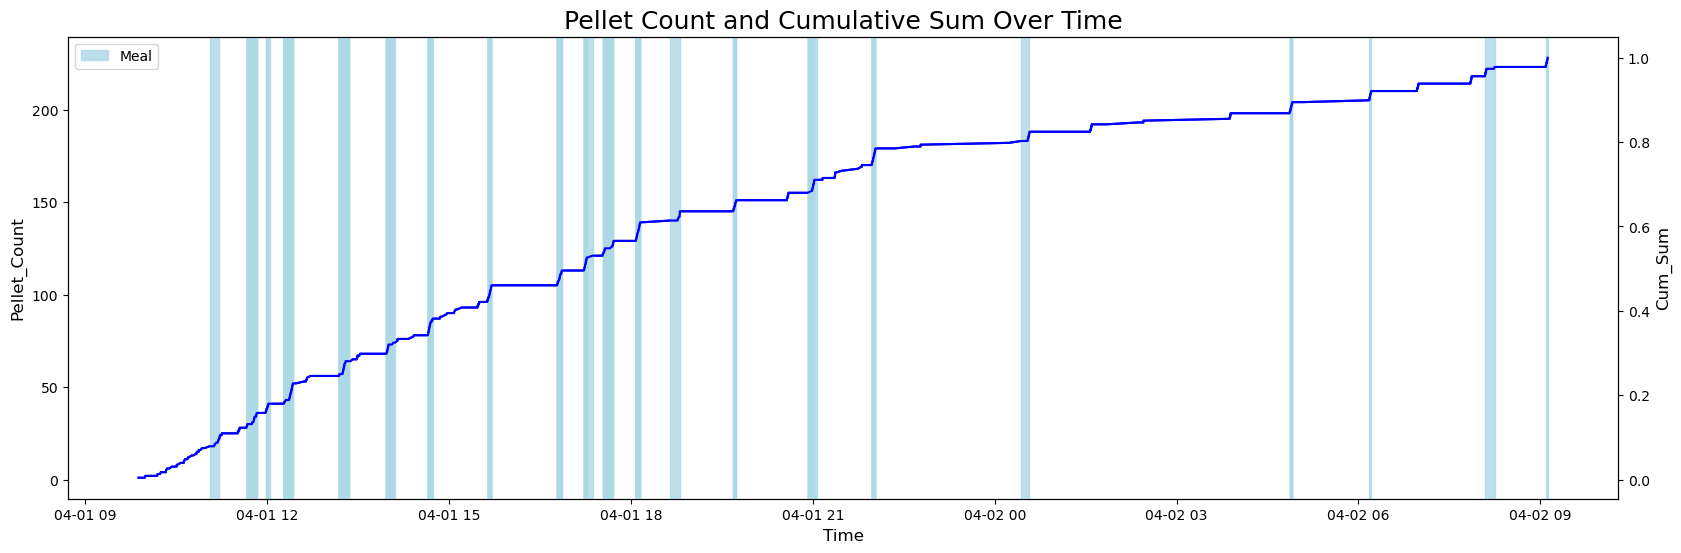

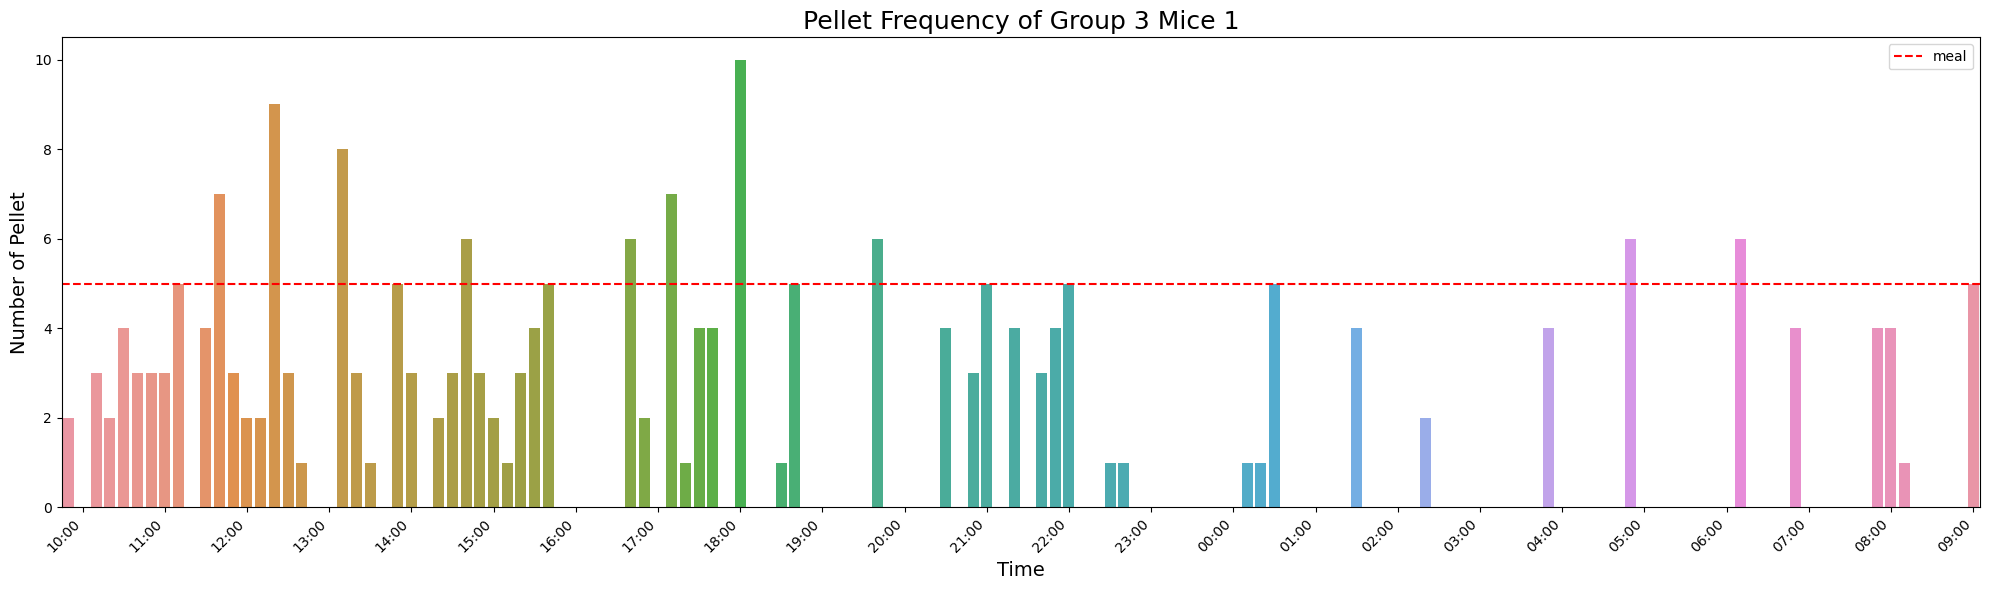

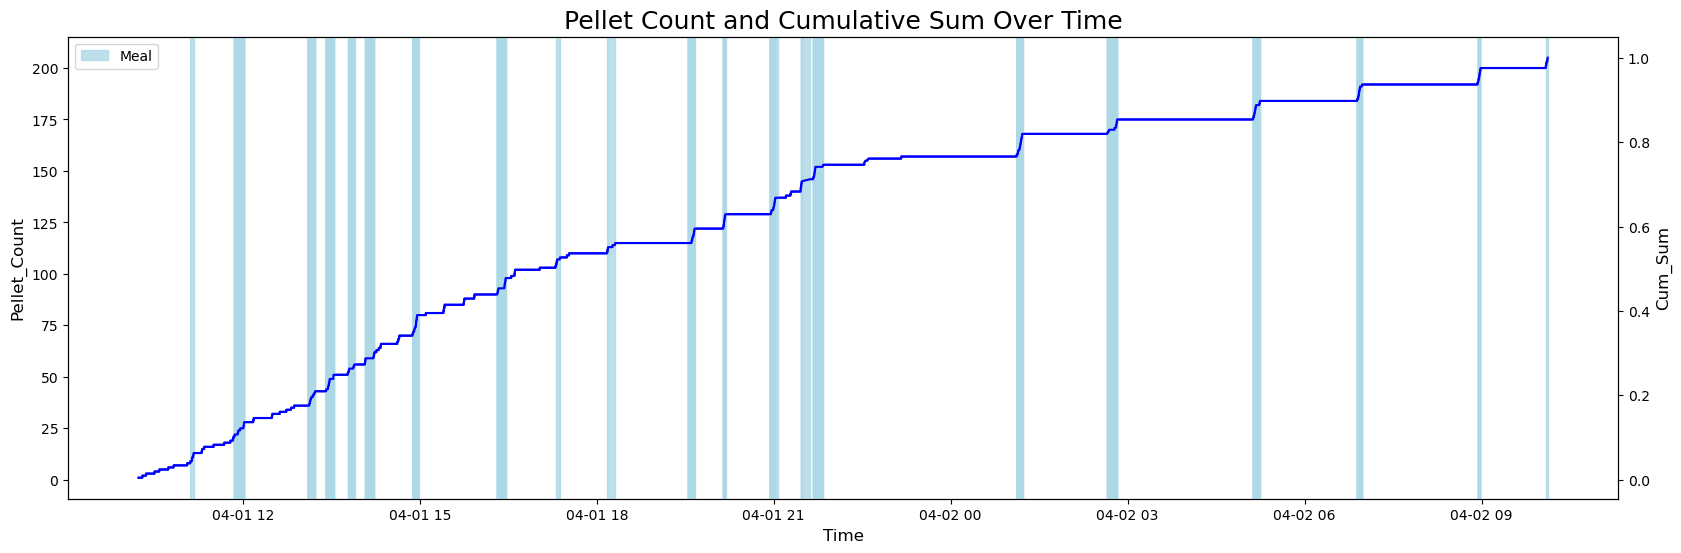

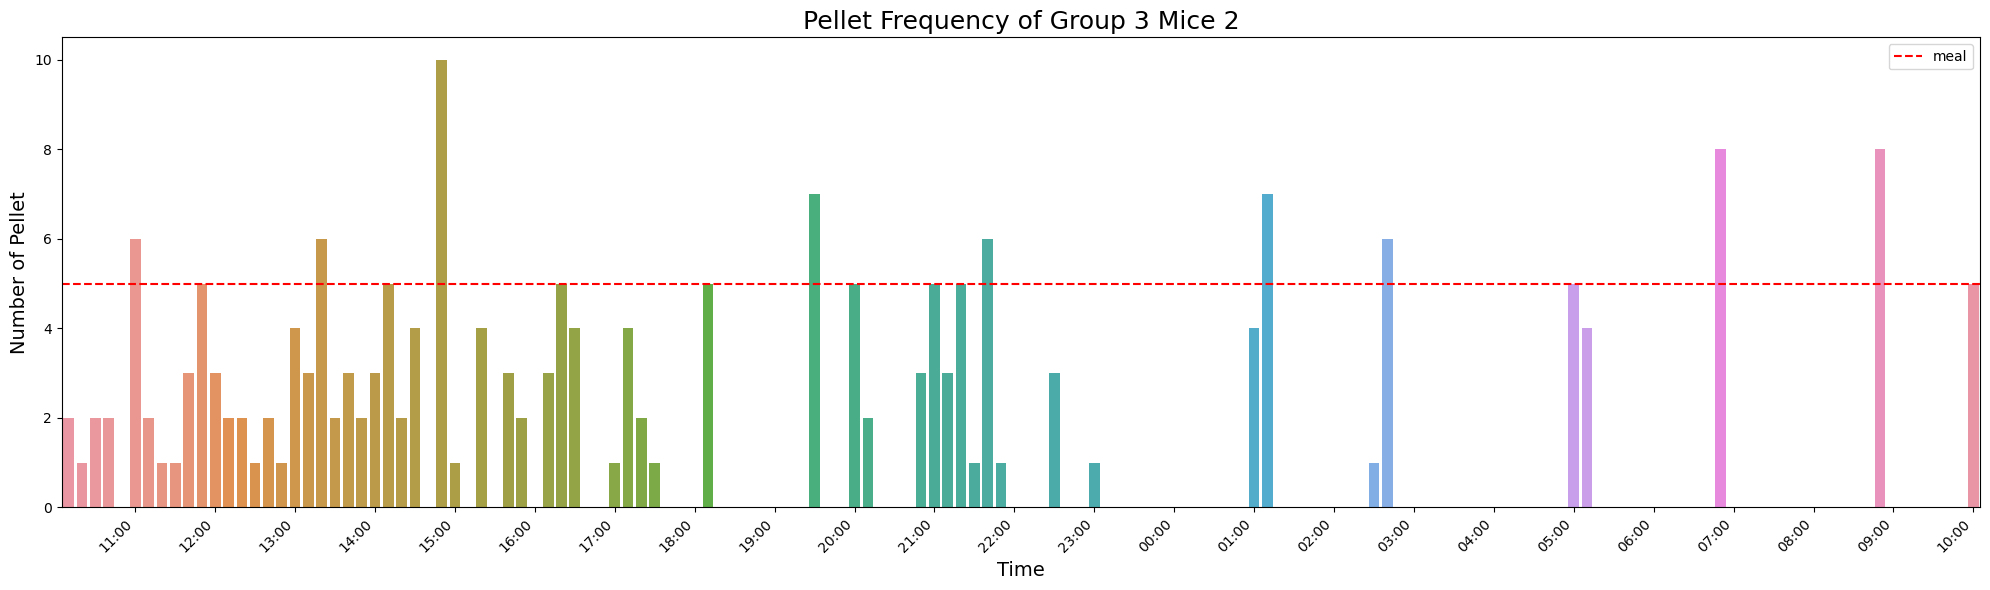

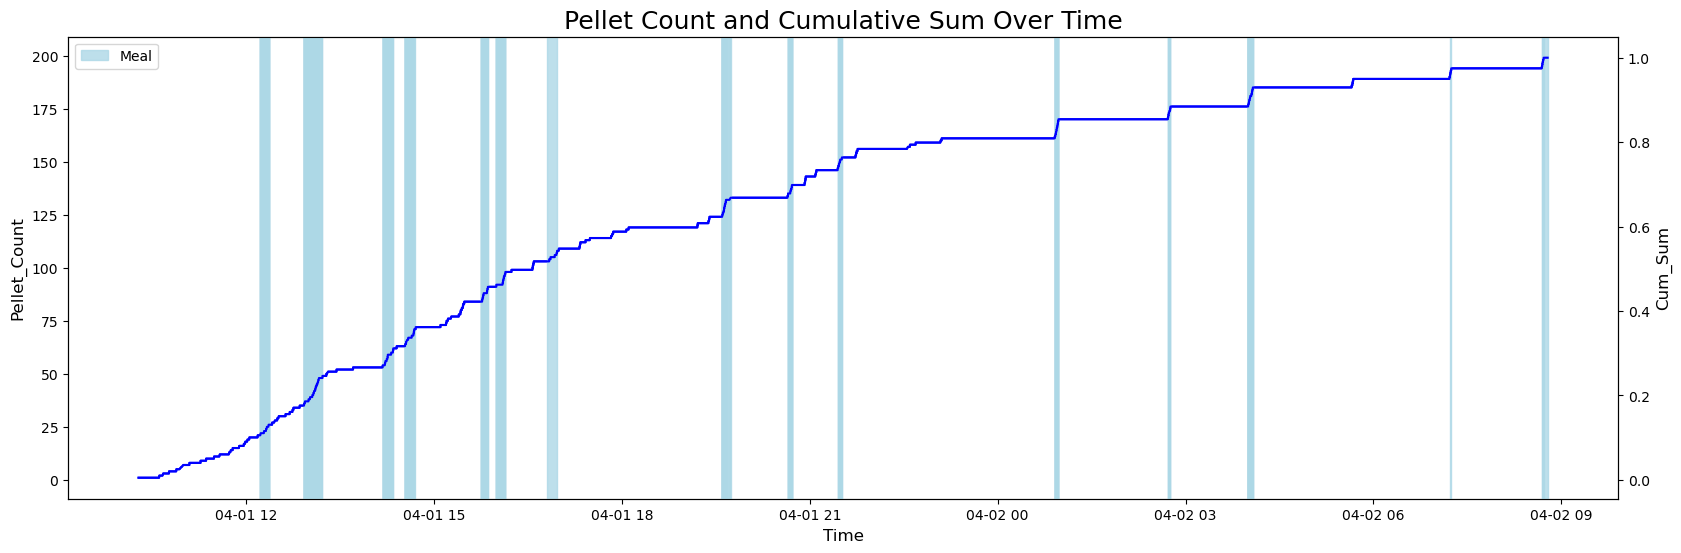

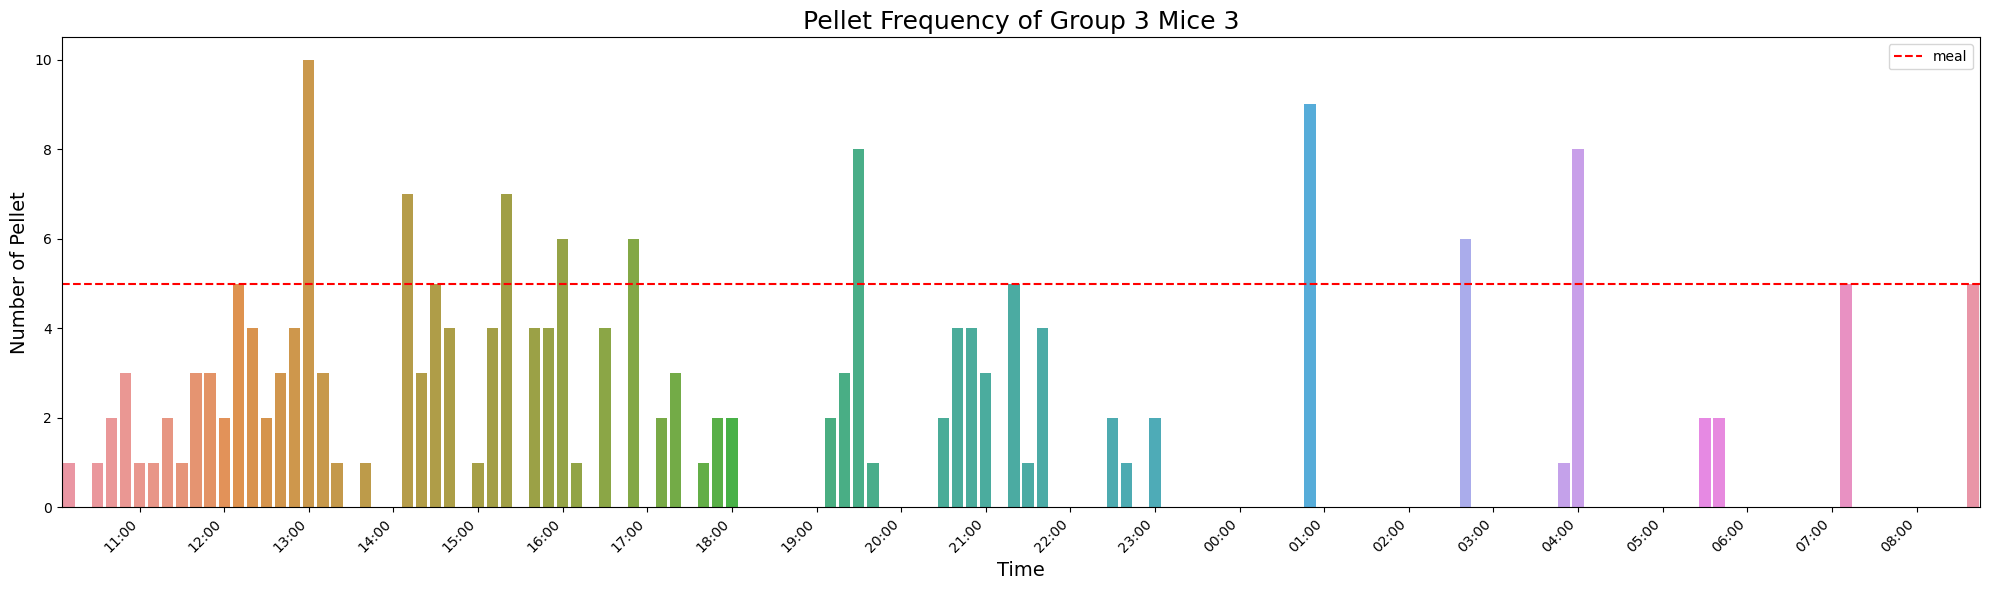

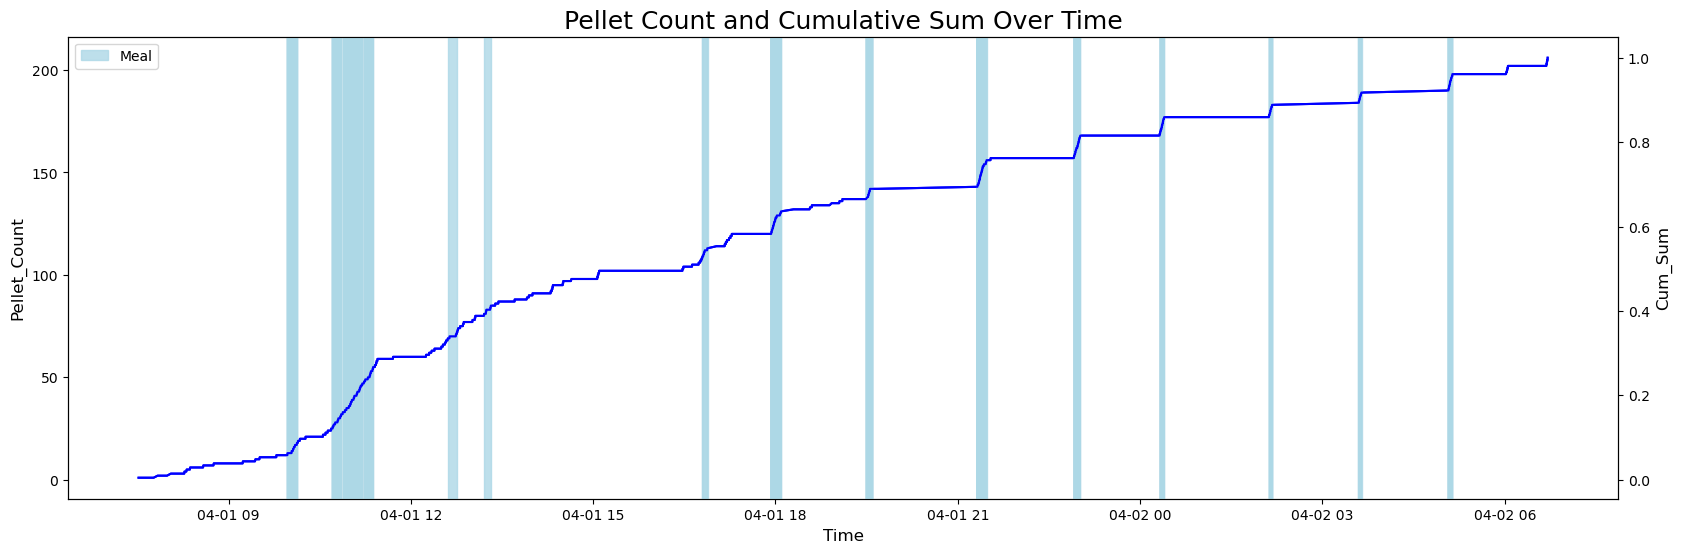

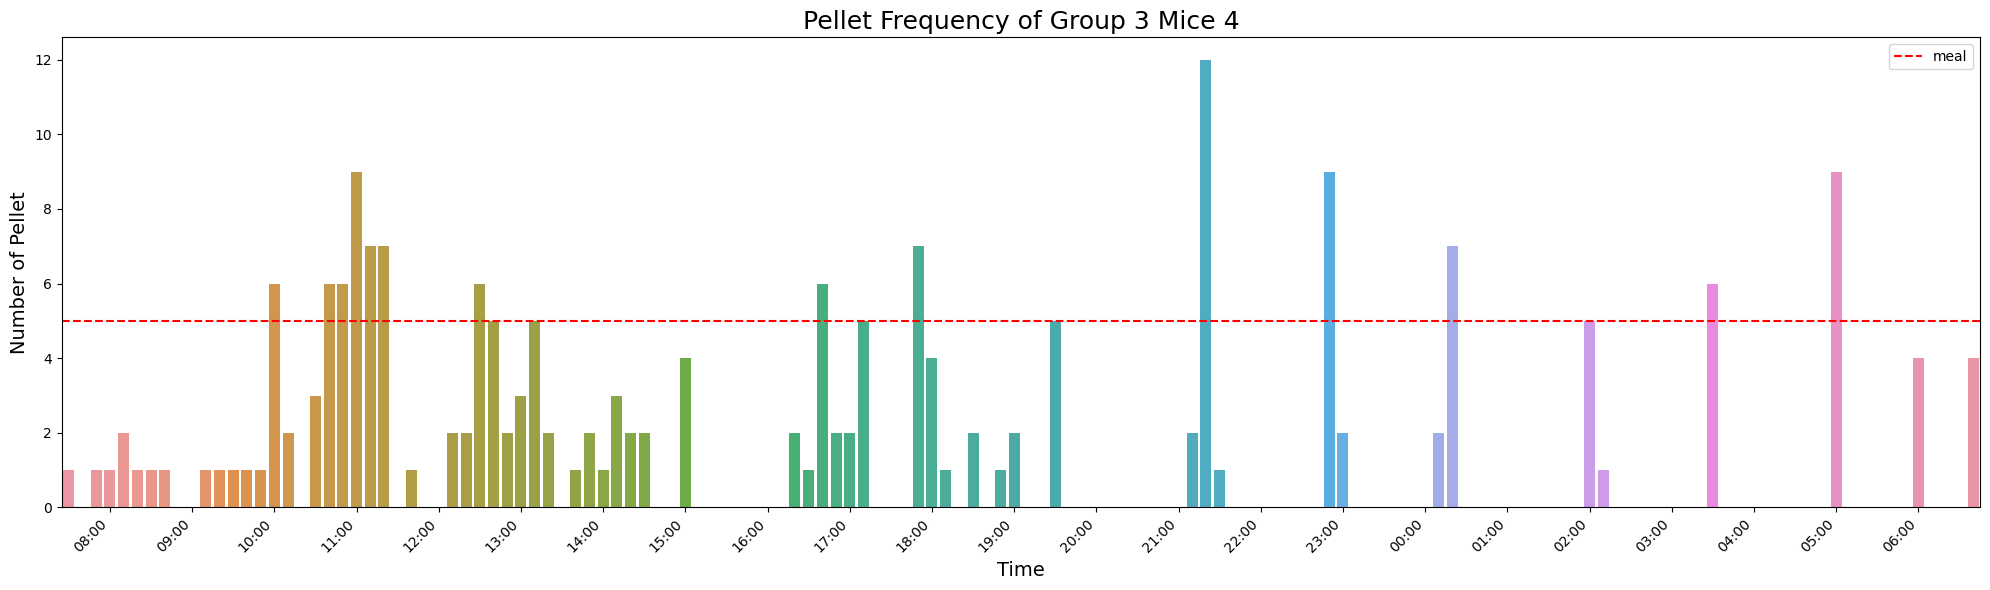

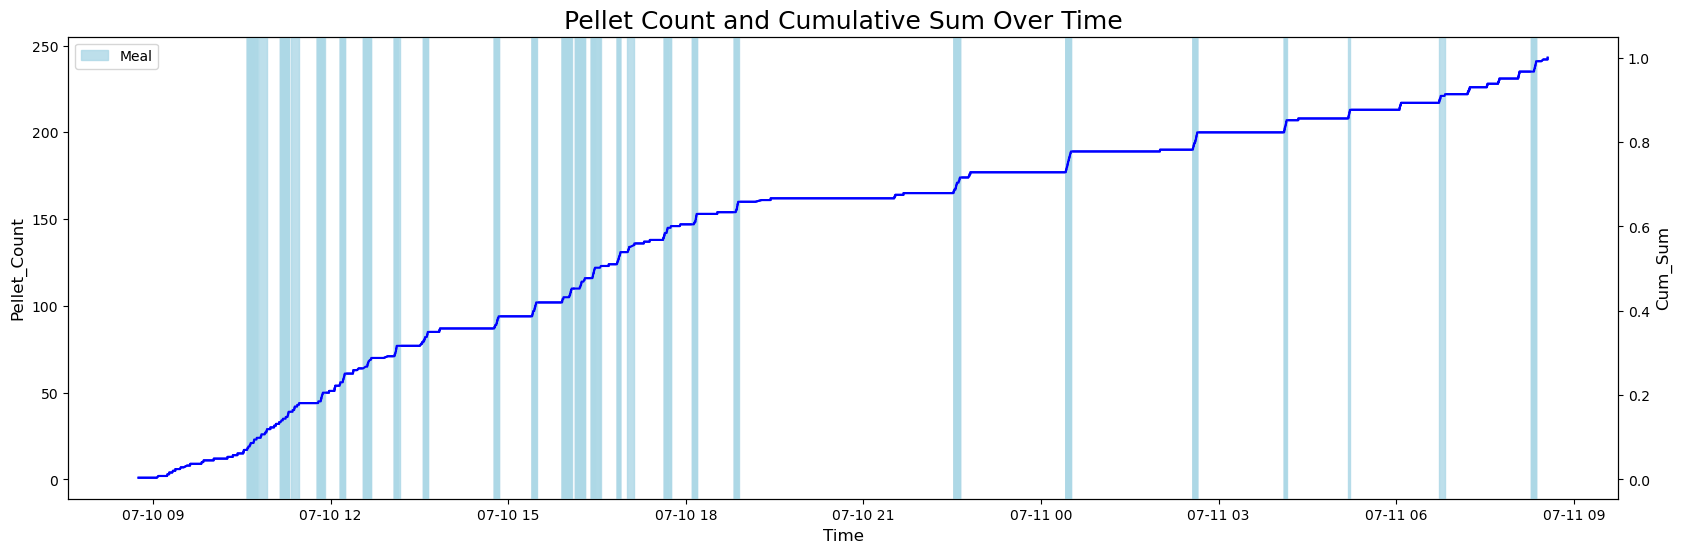

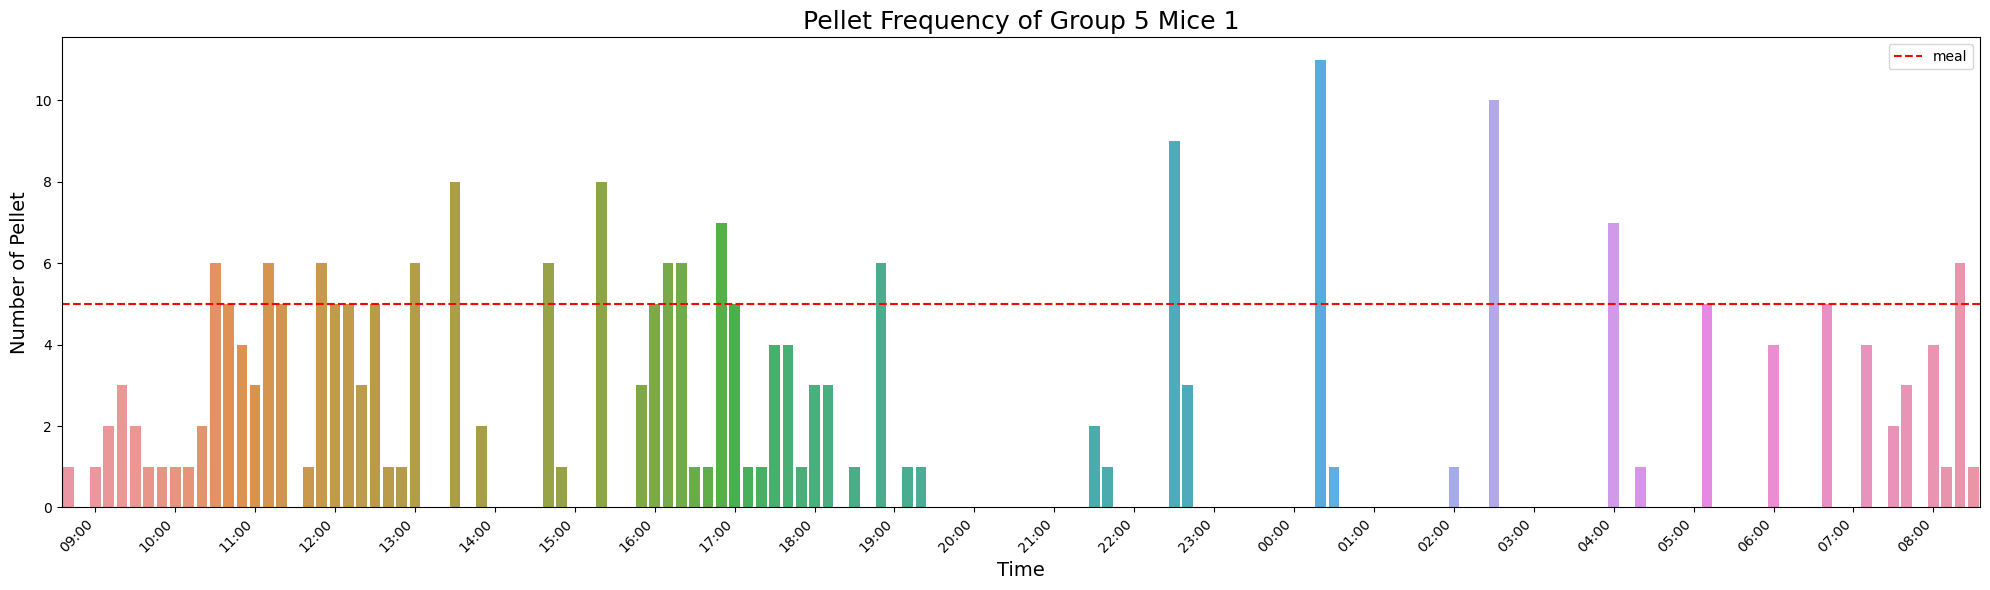

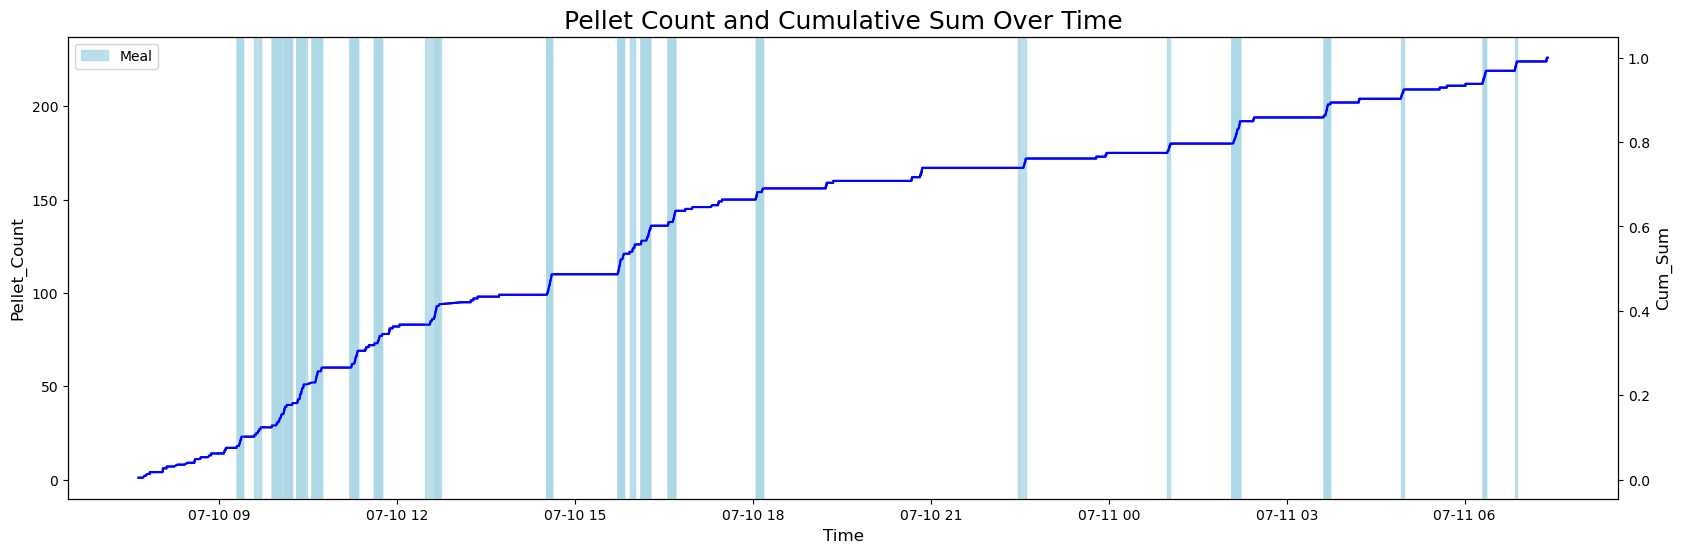

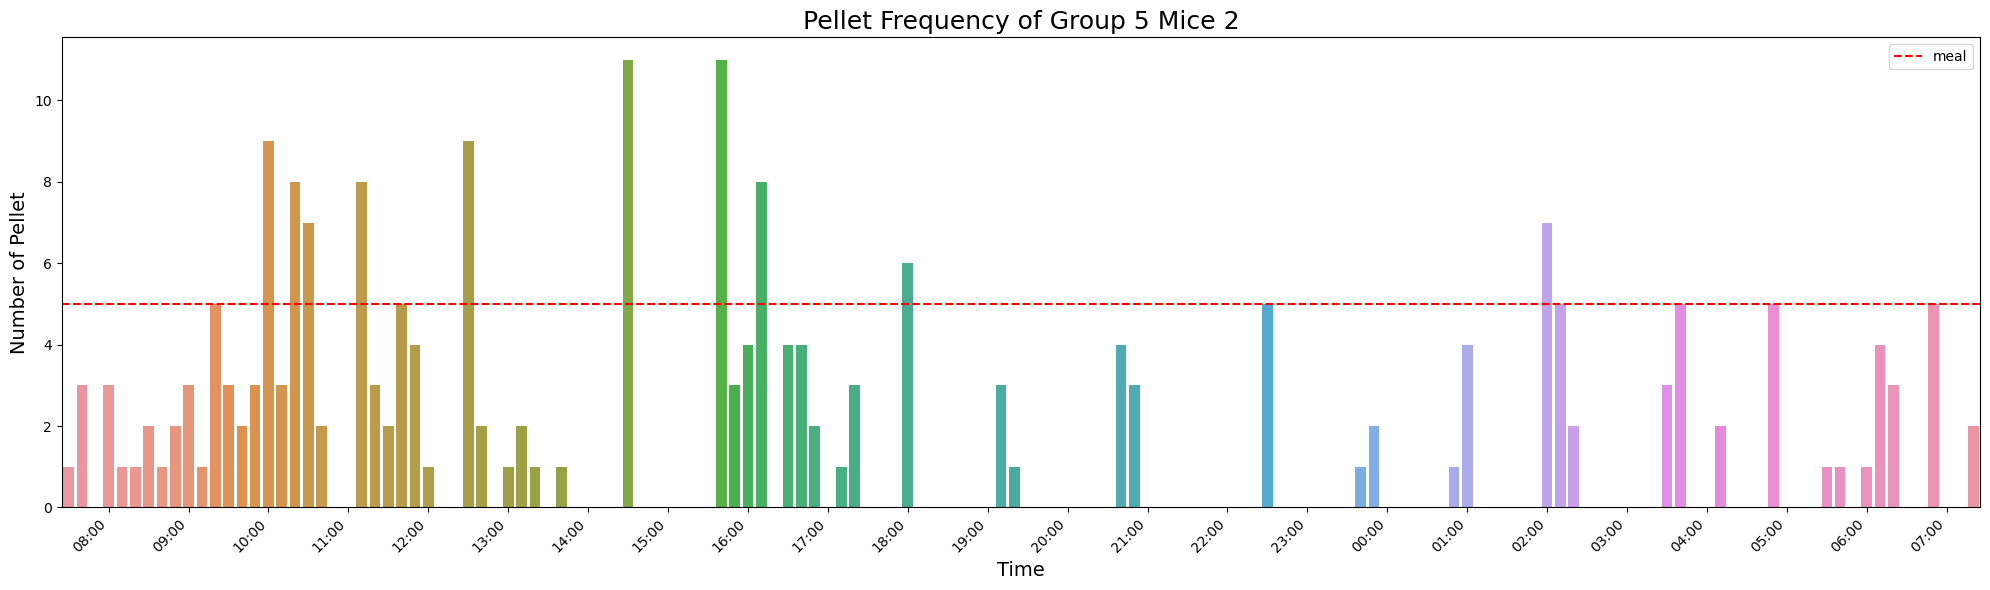

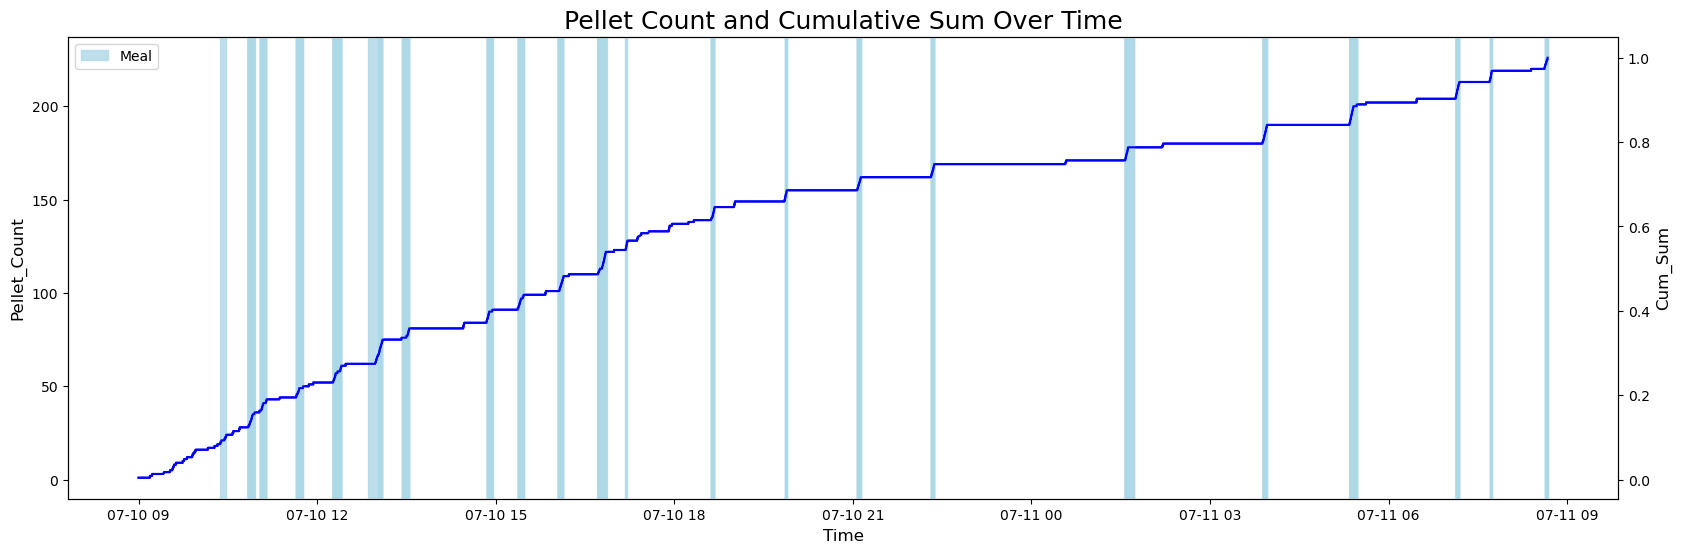

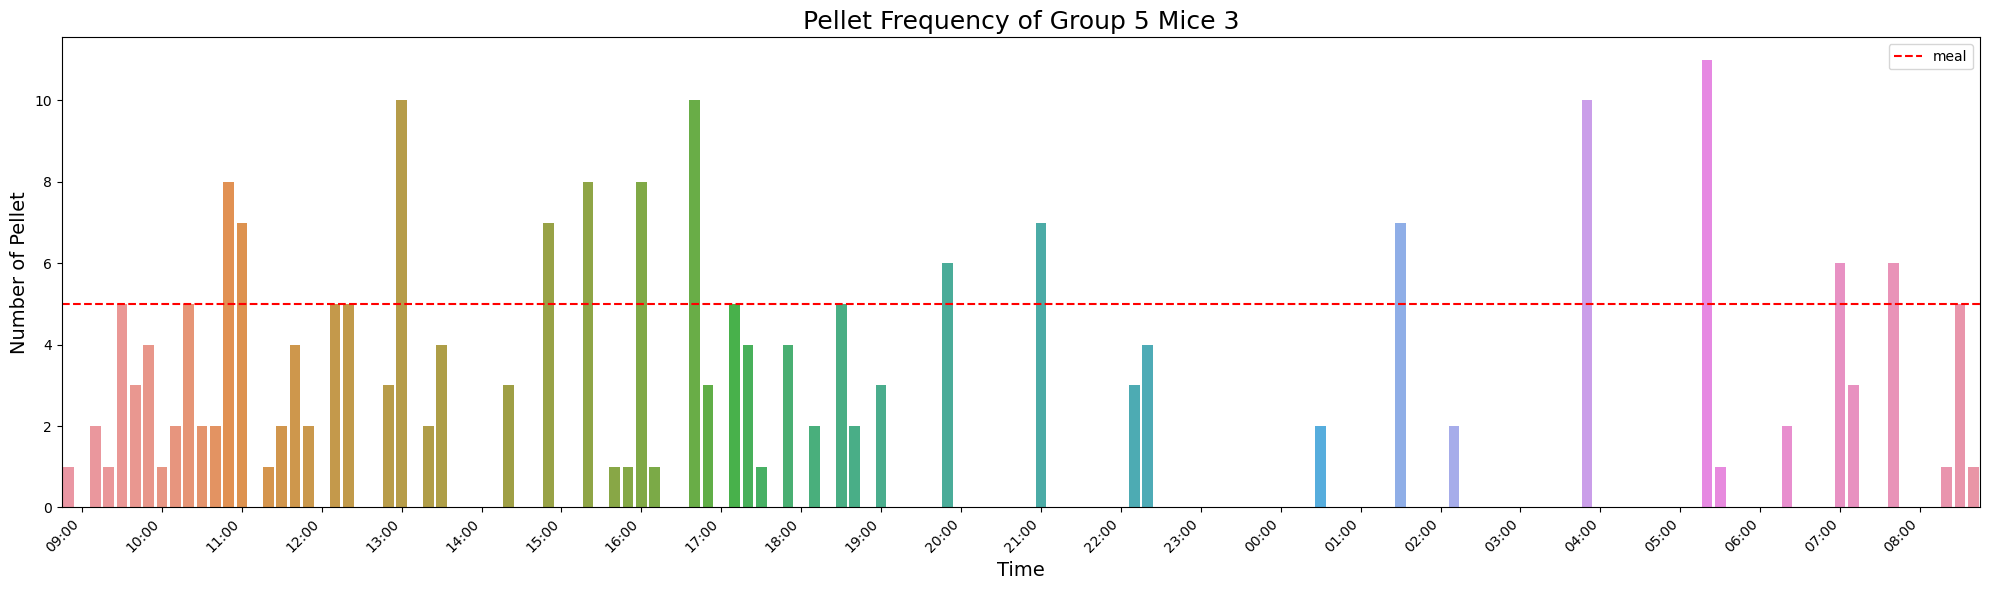

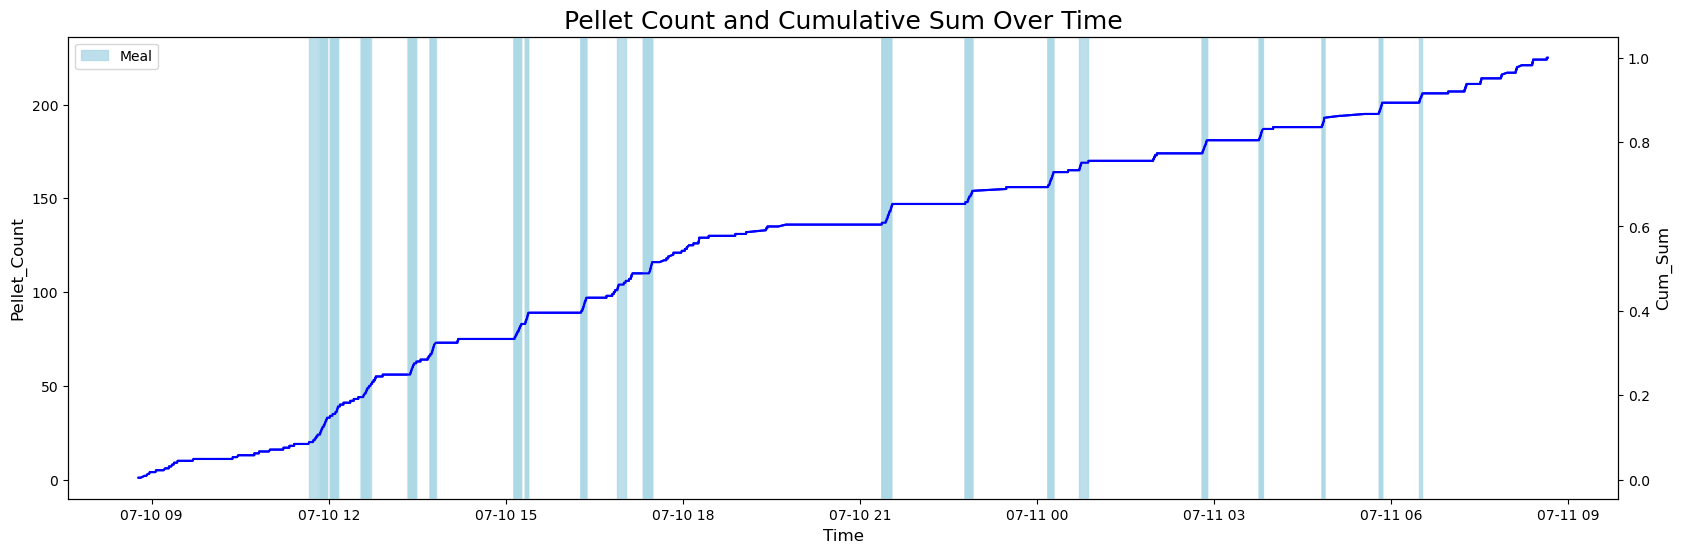

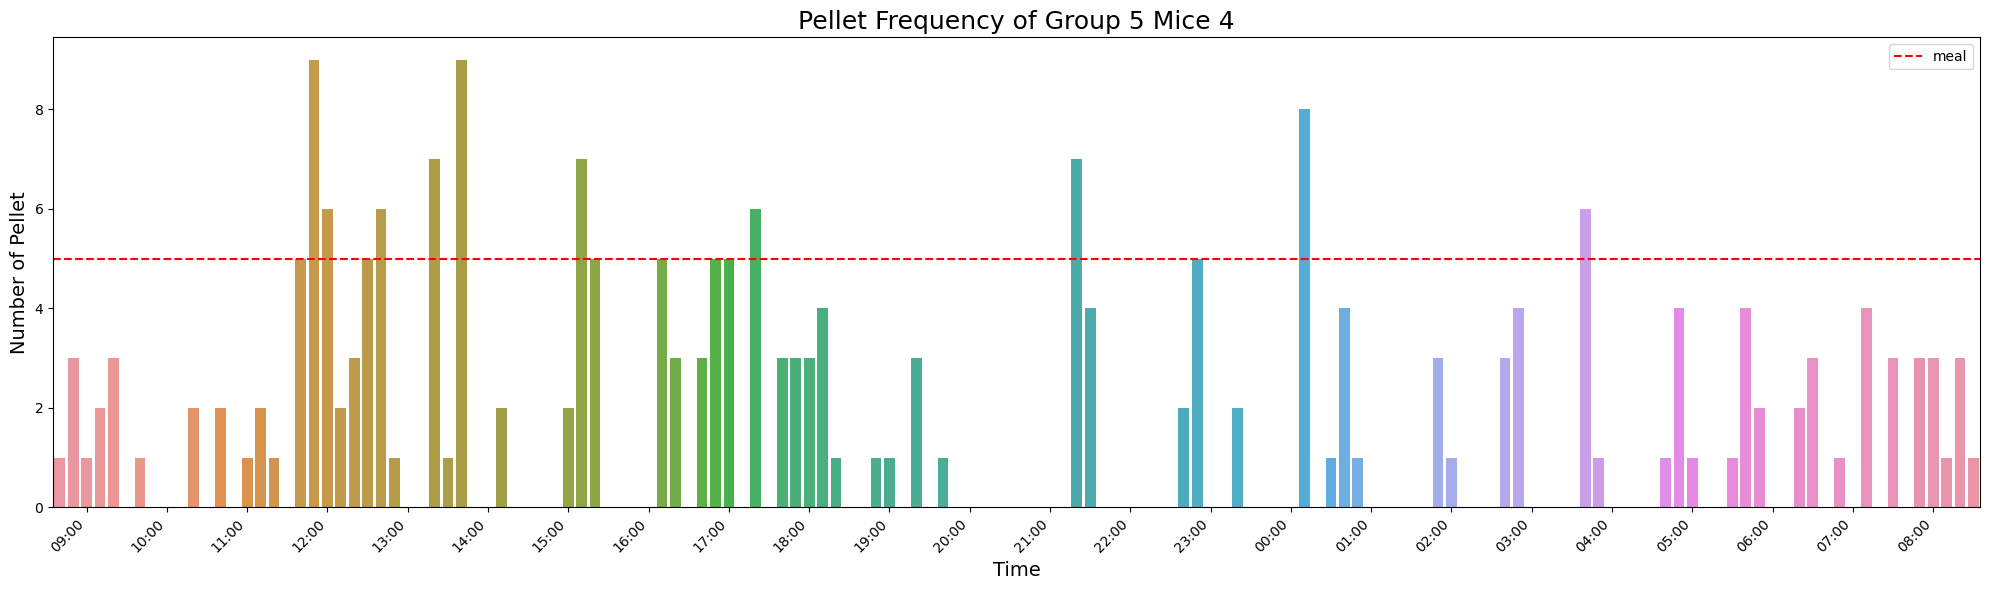

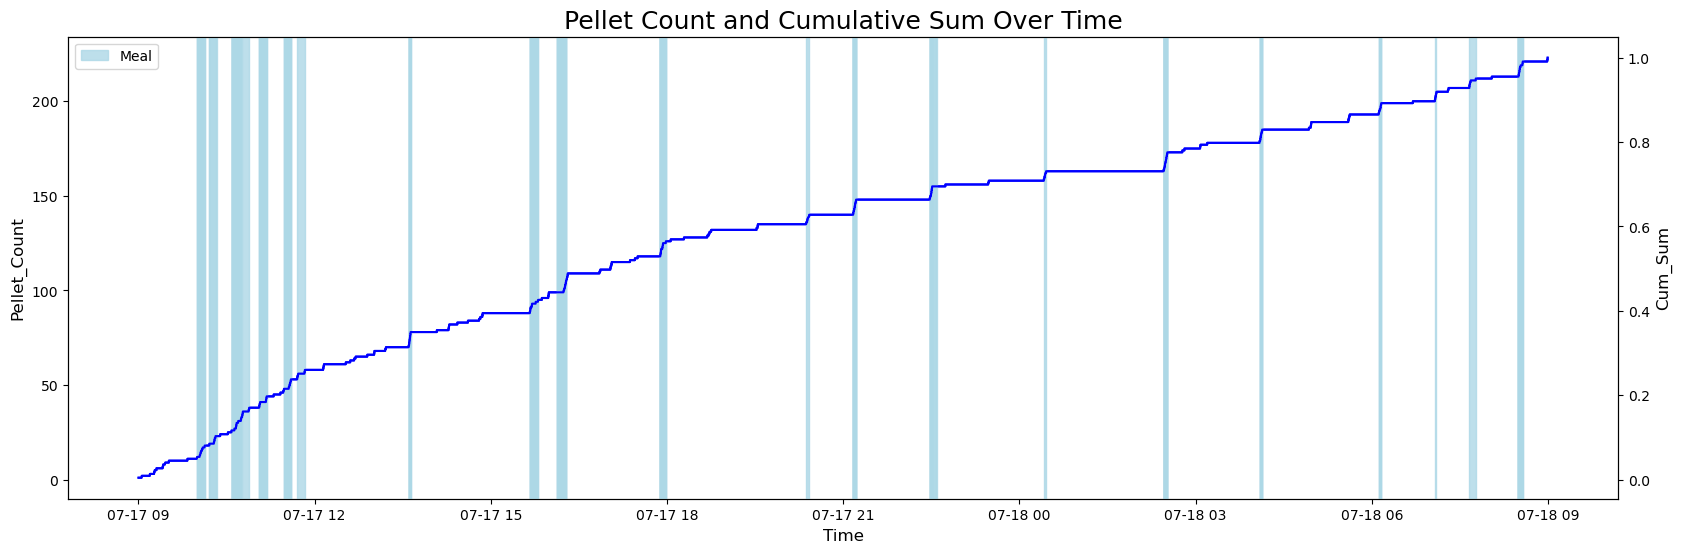

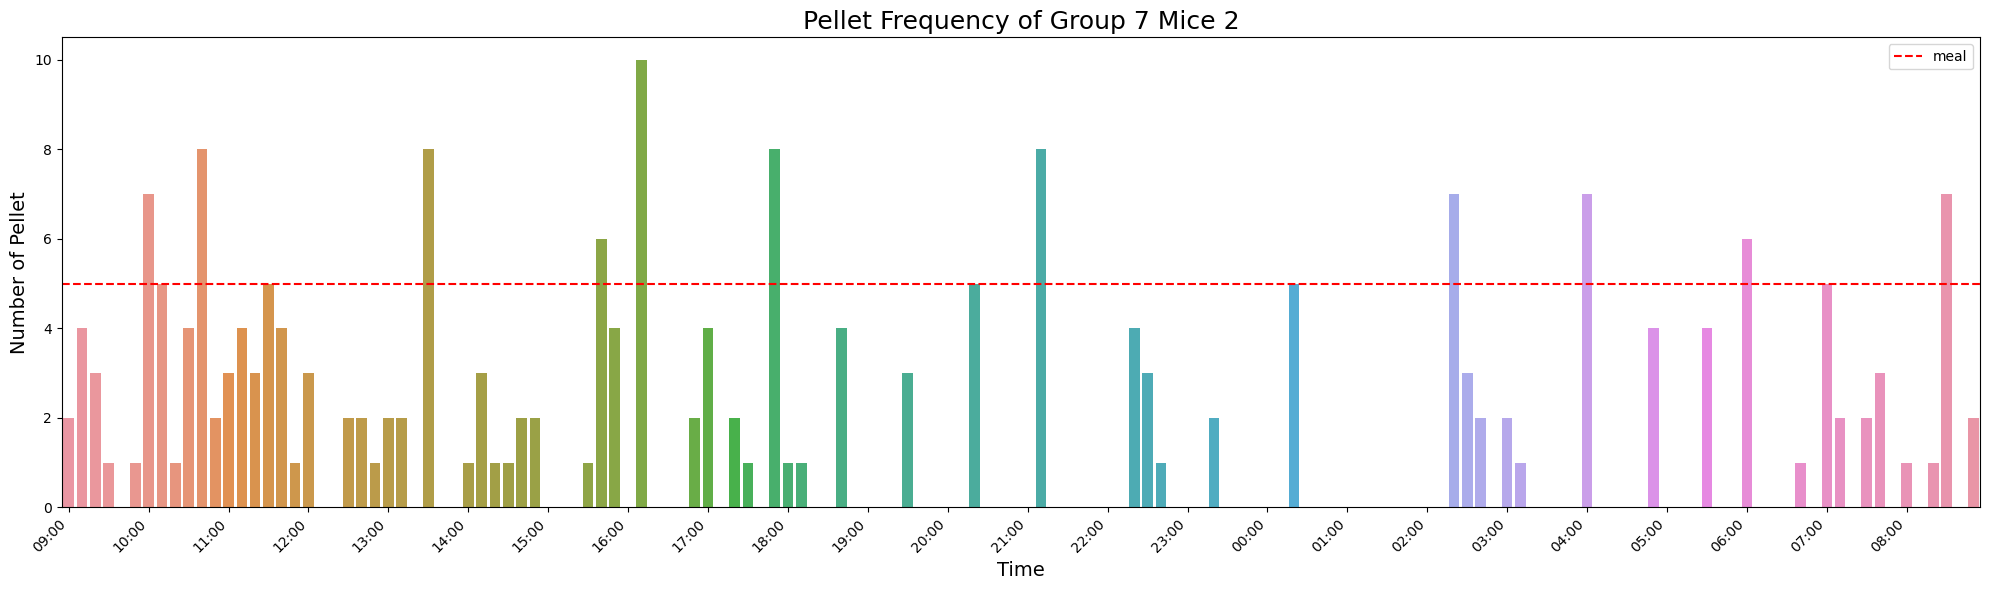

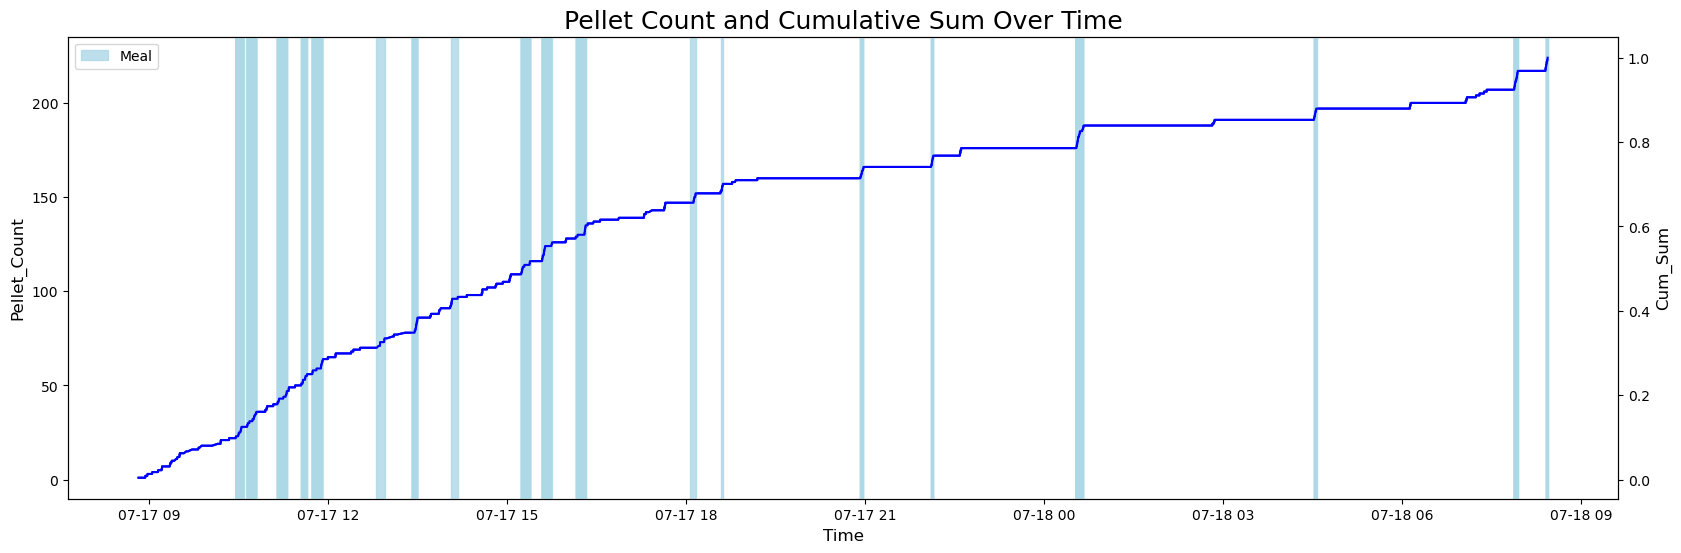

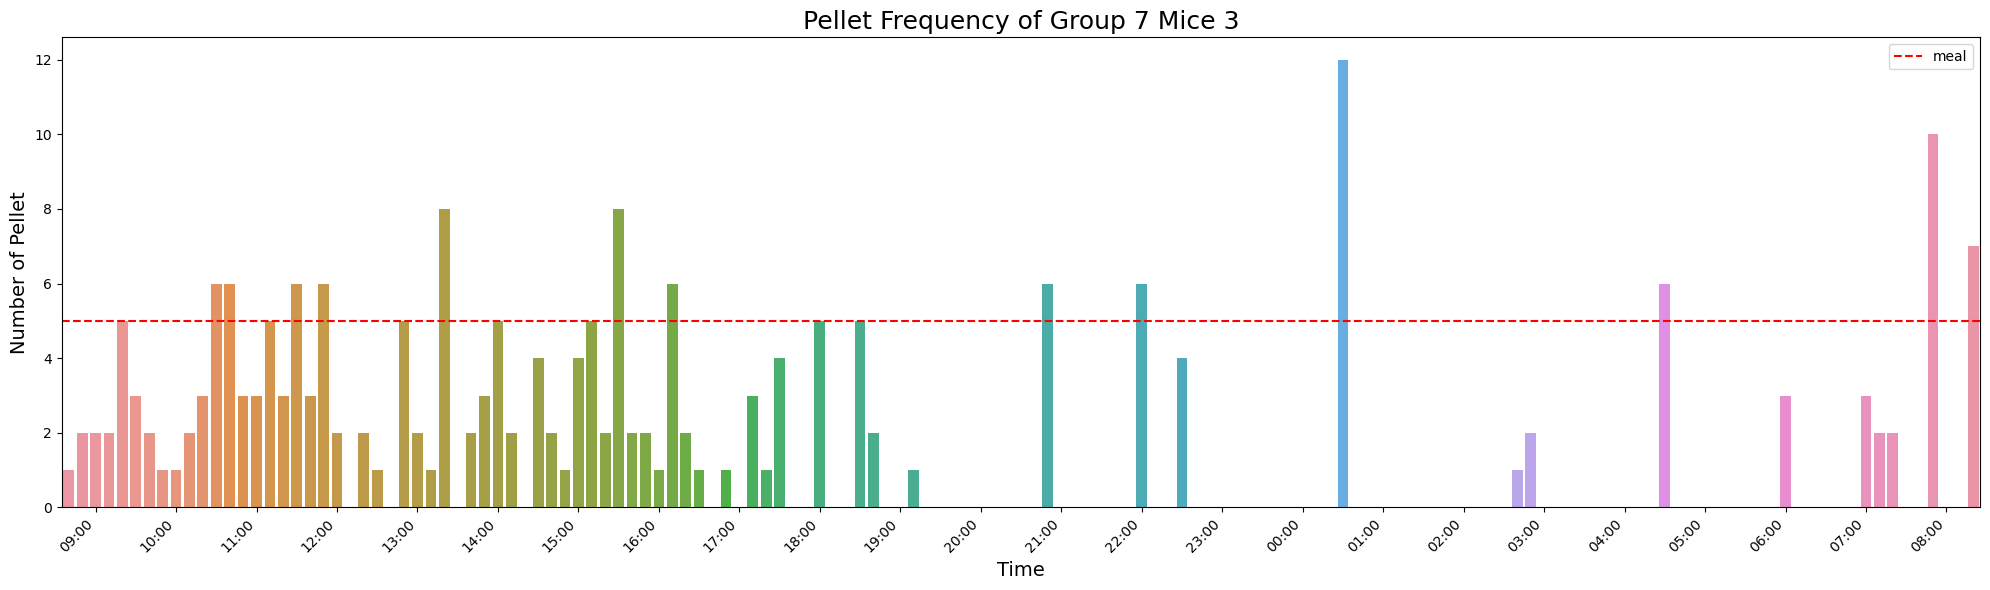

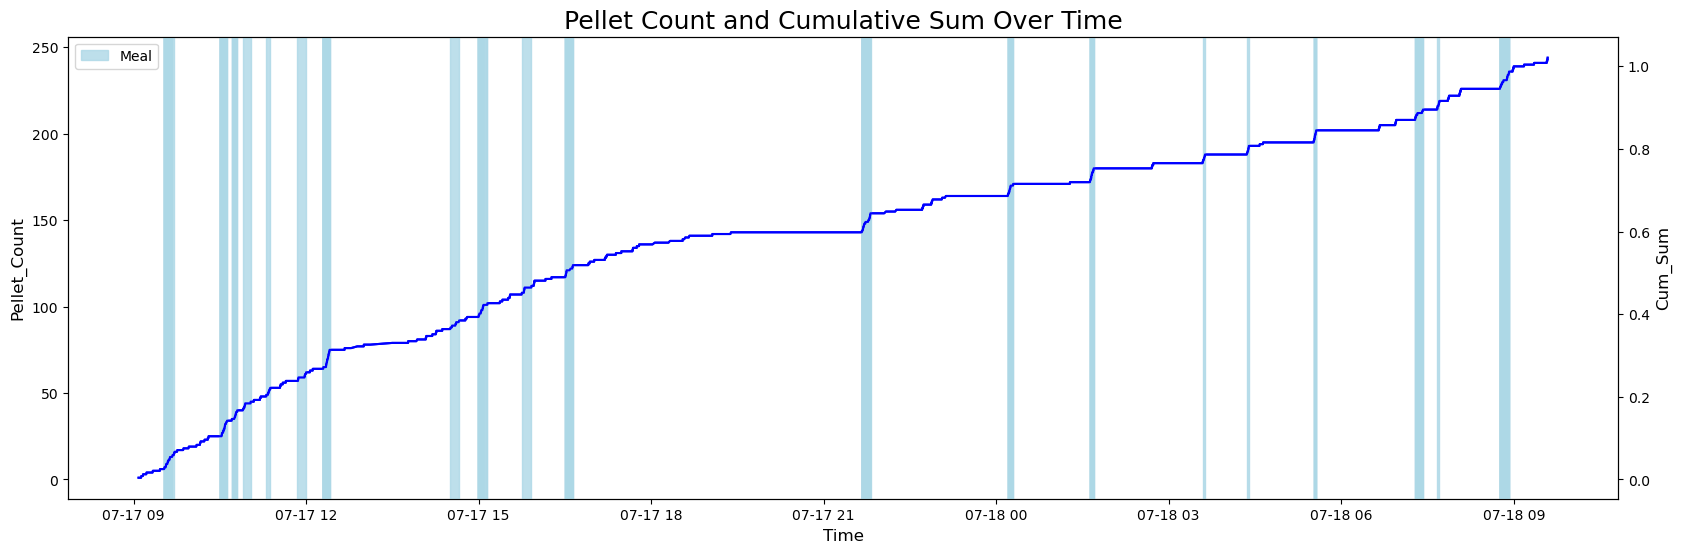

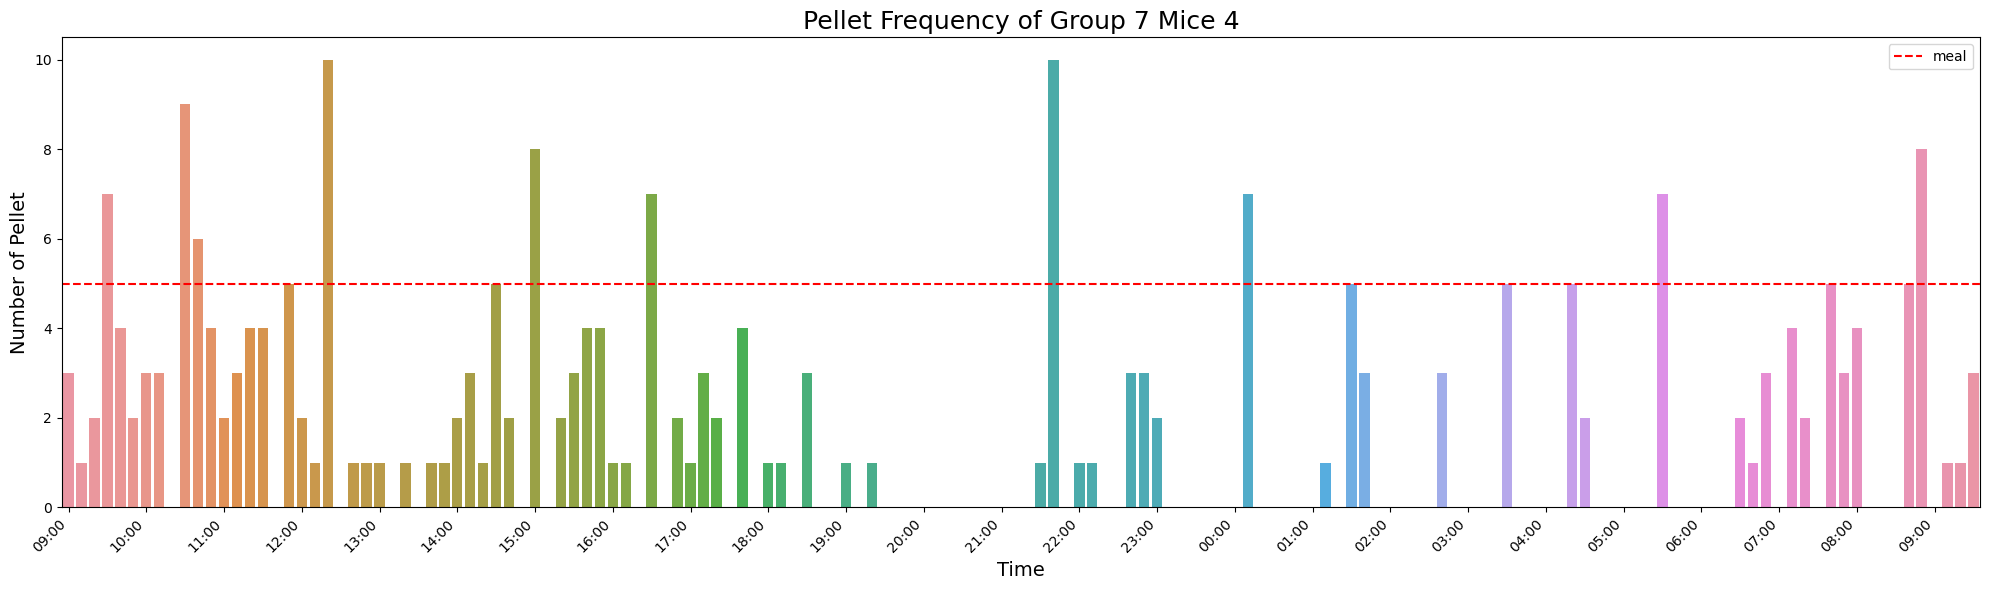

In [3]:
for sheet in paths.fr1_ctrl_sheet:
    data = ml.process_sheet(path, sheet)
    meal = ml.find_meals(data)
    ml.graphing_cum_count(data, meal)
    group = ml.find_pellet_frequency(data)
    bhv, num = tl.get_info_from_sheet(sheet)
    ml.graph_pellet_frequency(group, bhv, num)
    temp = ml.average_pellet(group)
    ctrl_pellet_avg.append(temp)

## CASK Group

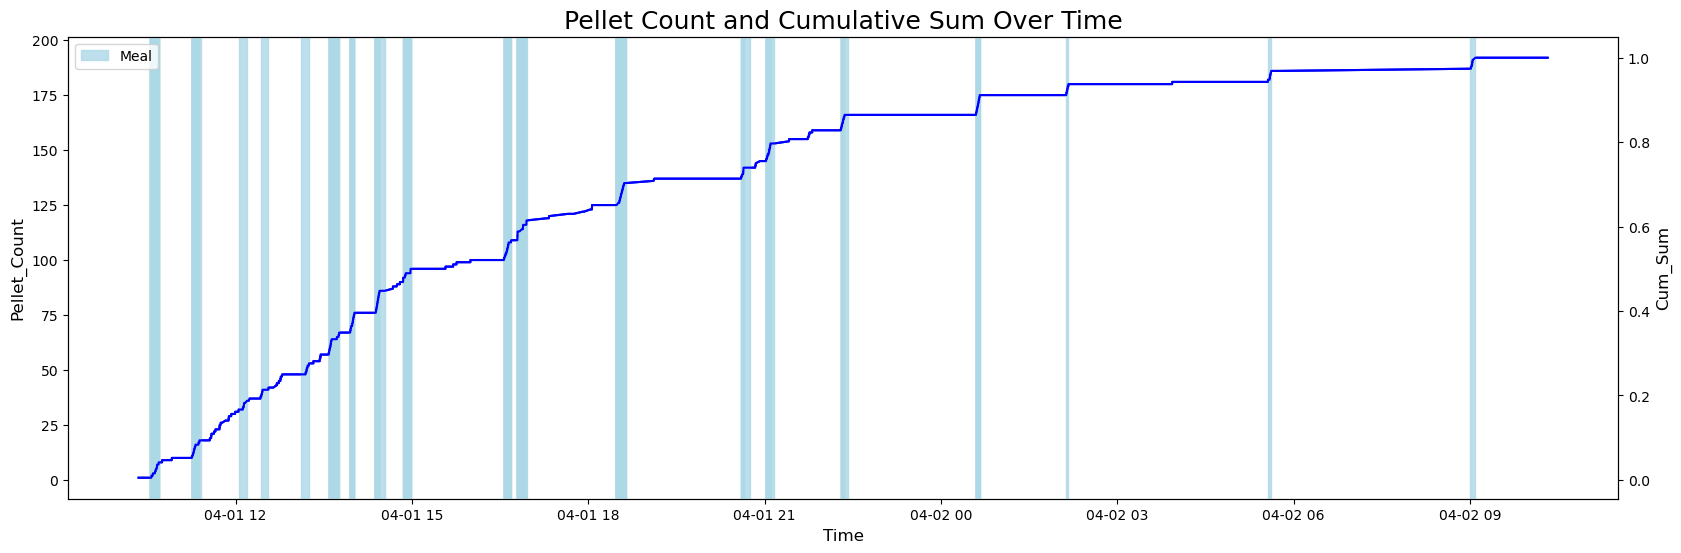

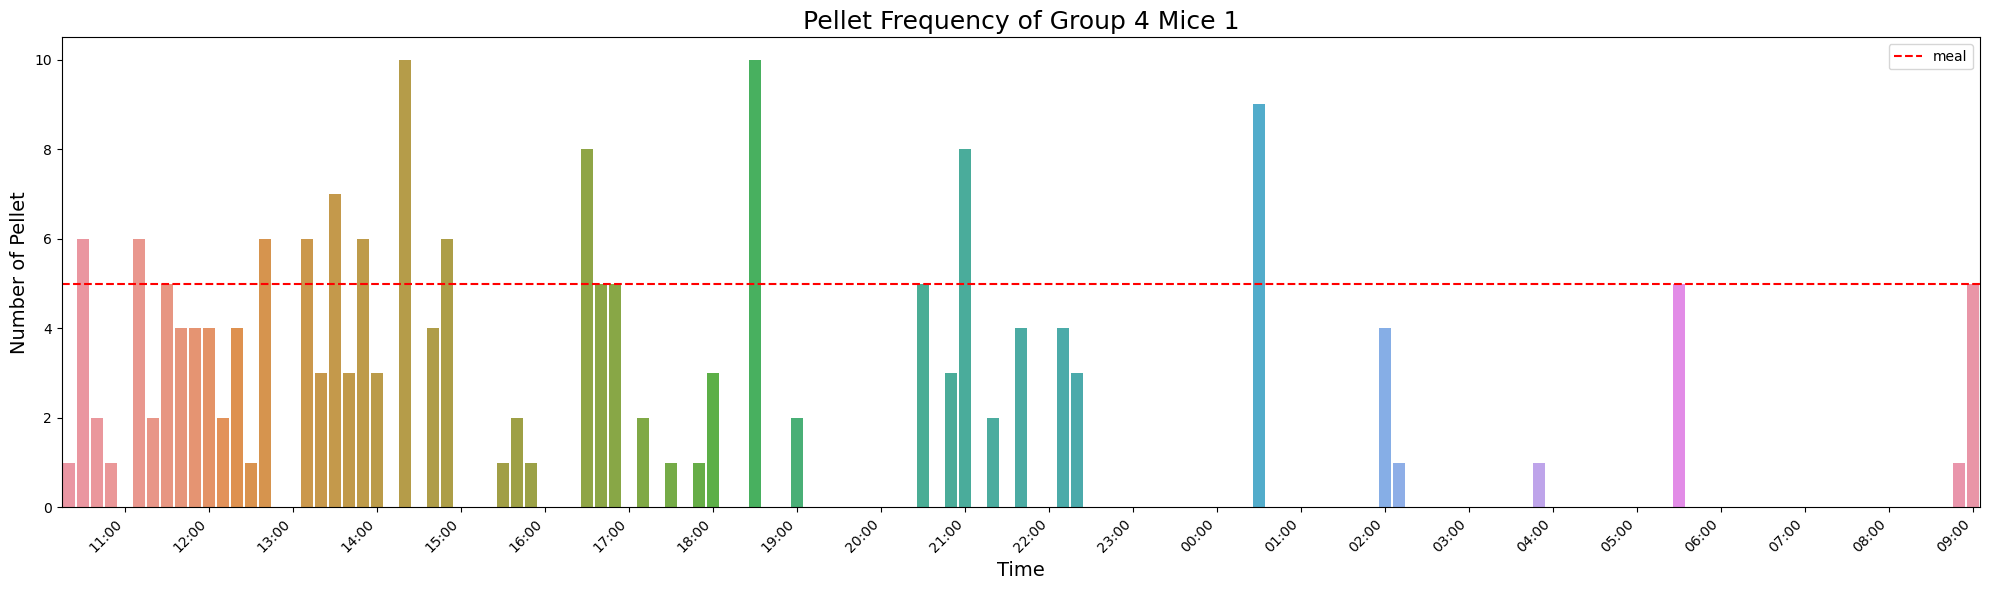

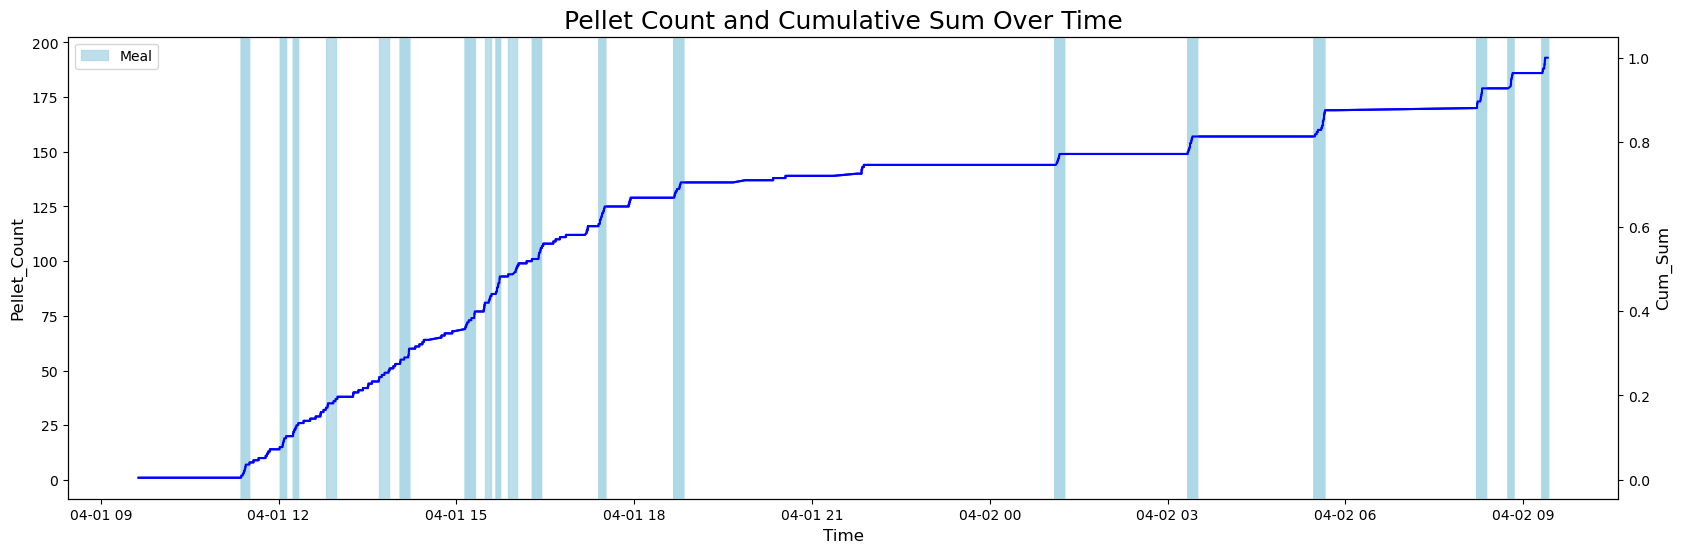

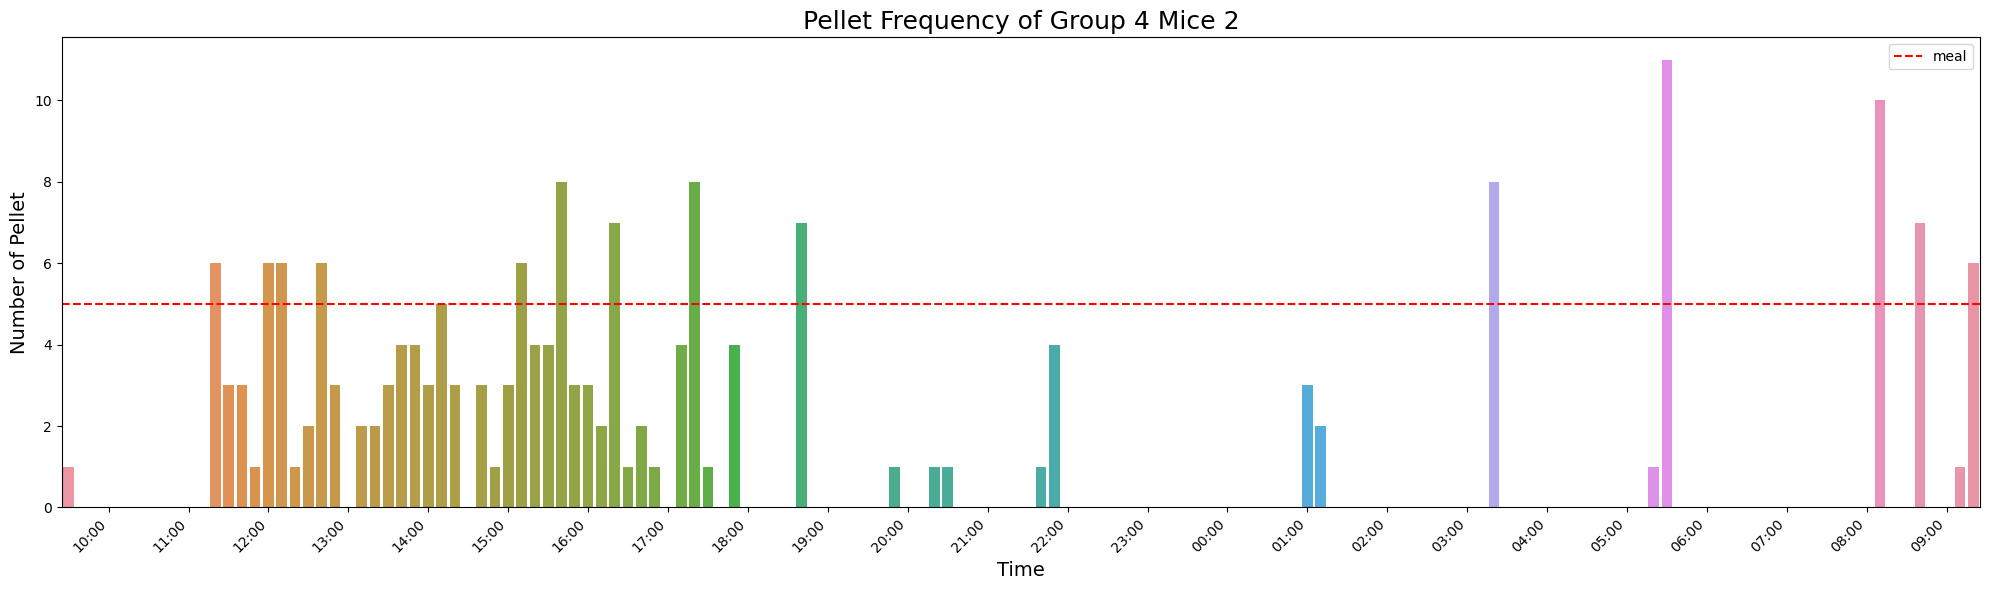

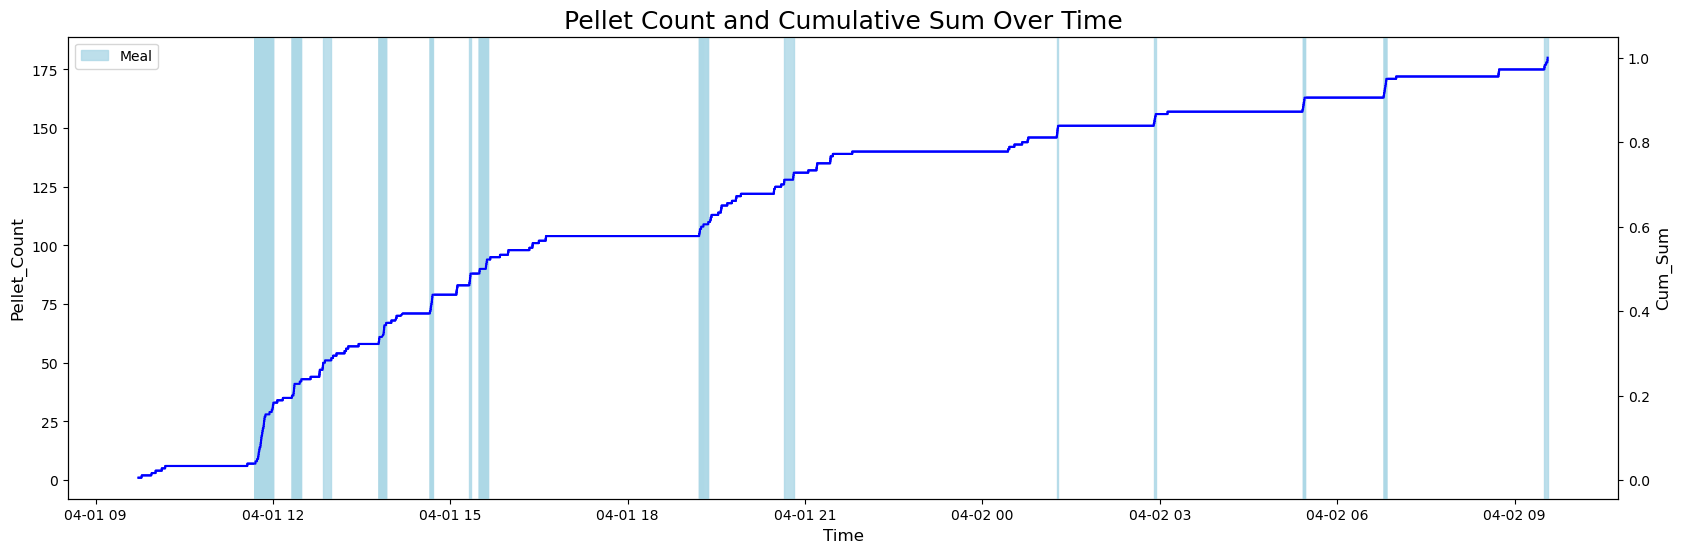

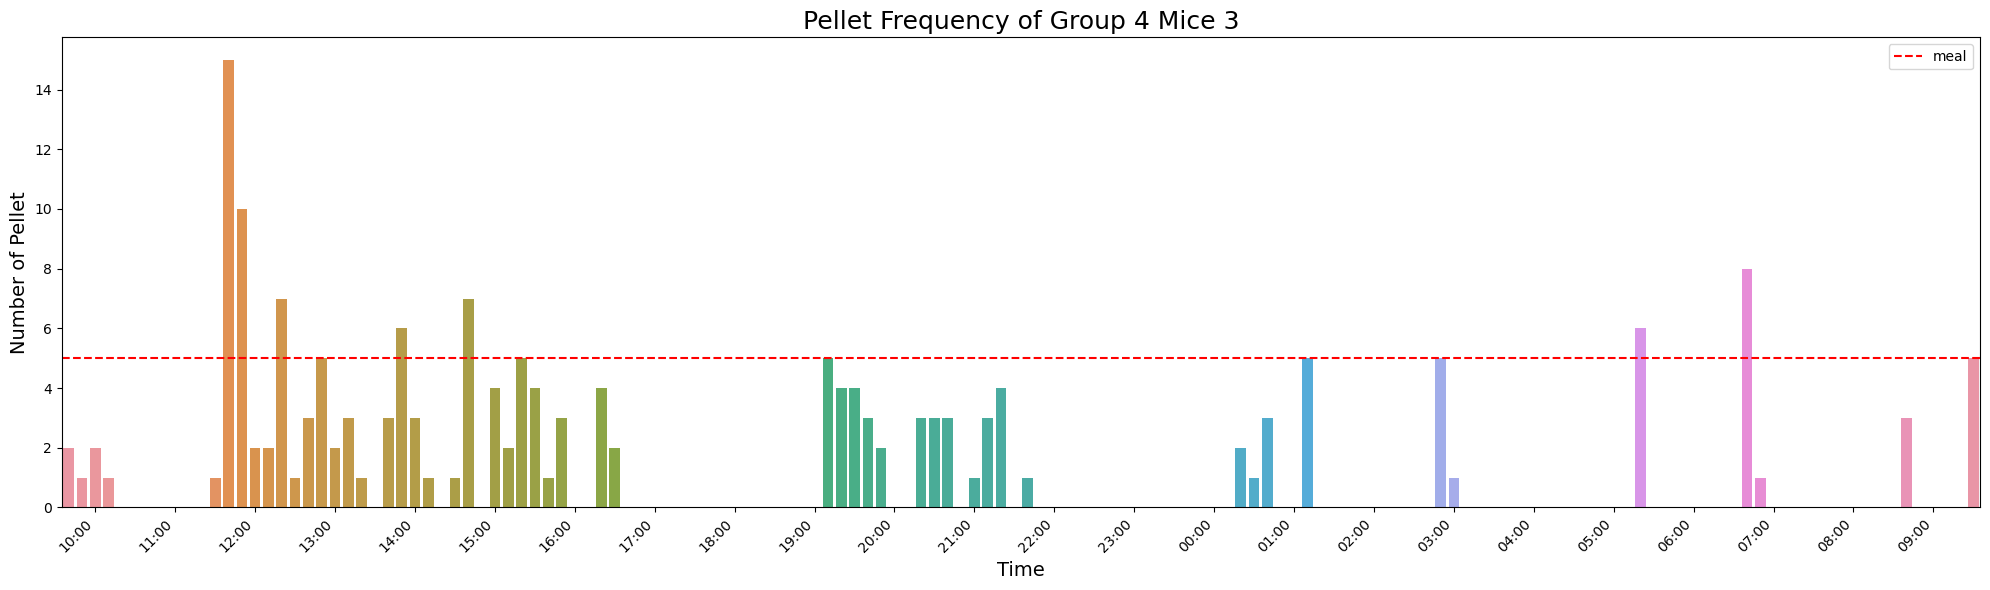

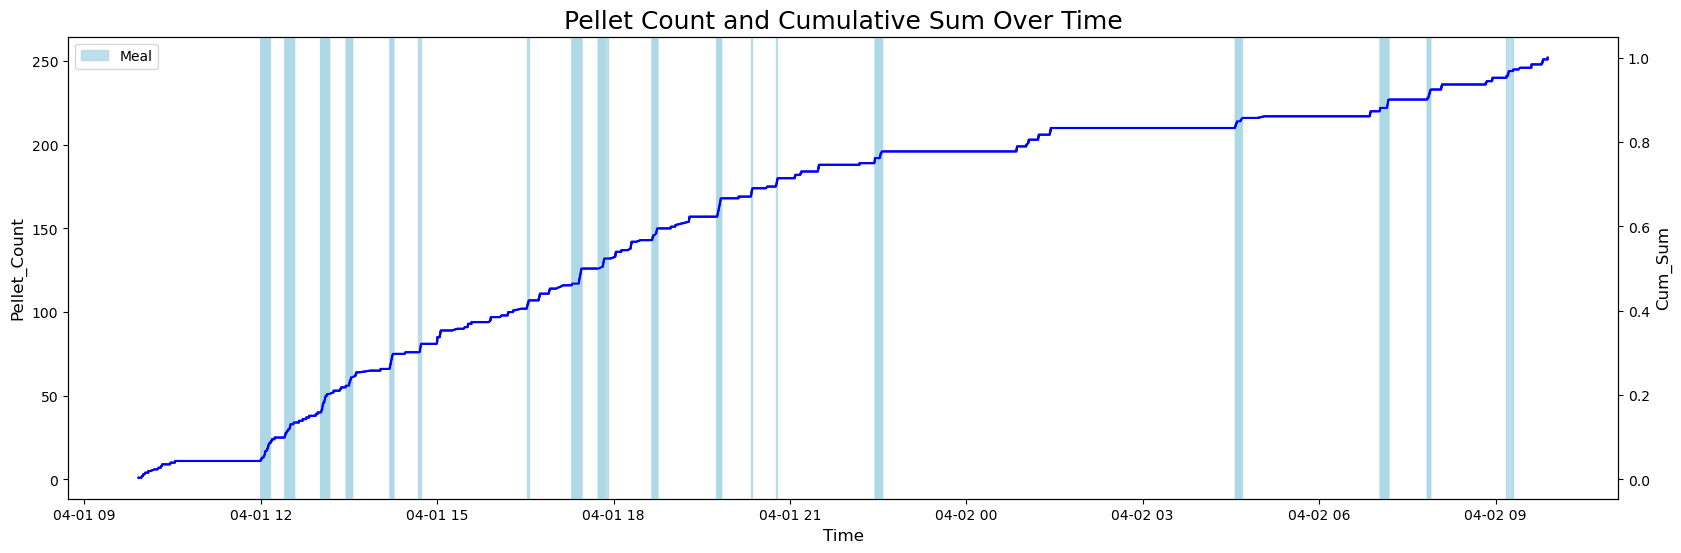

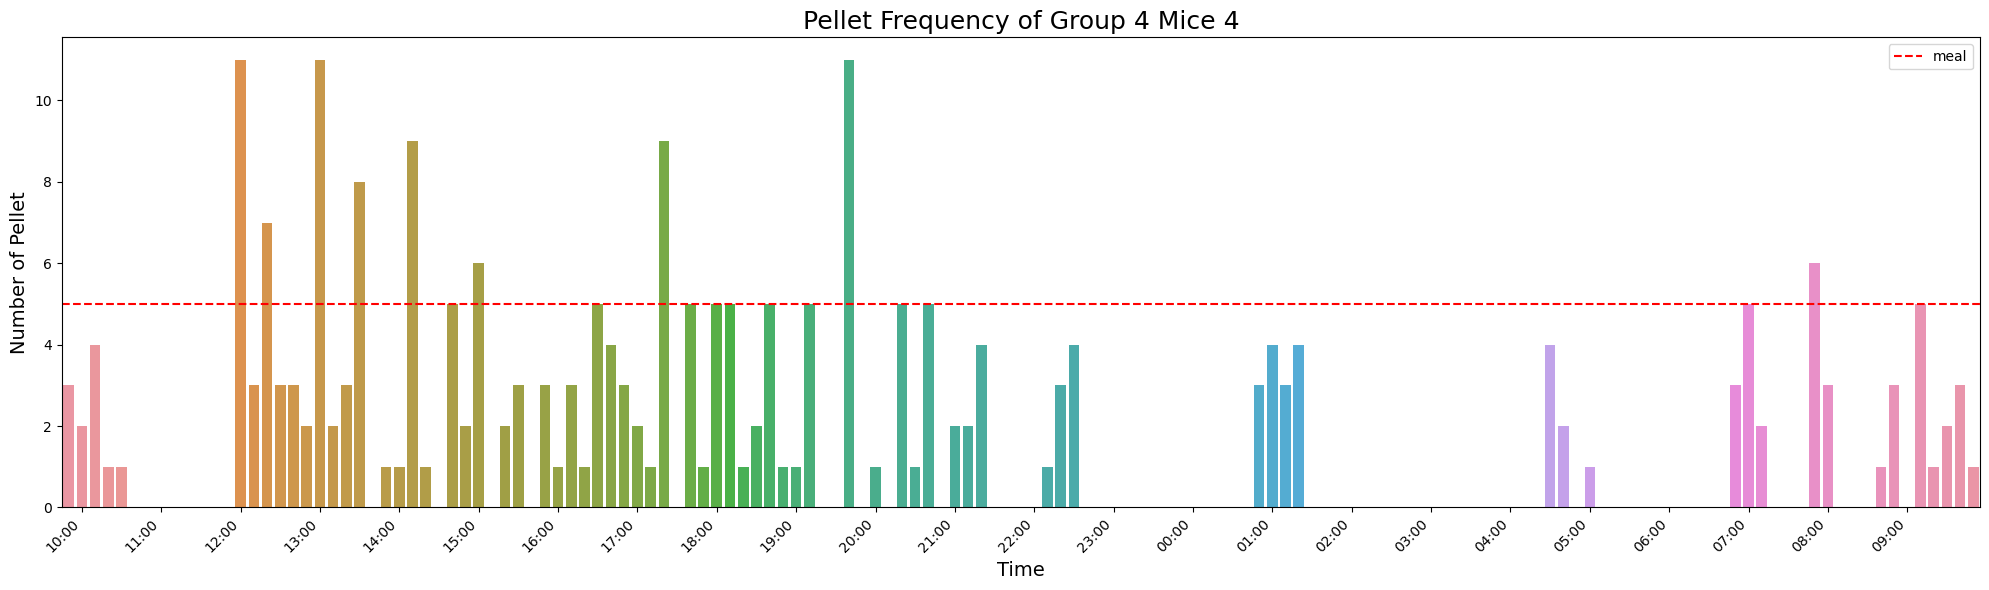

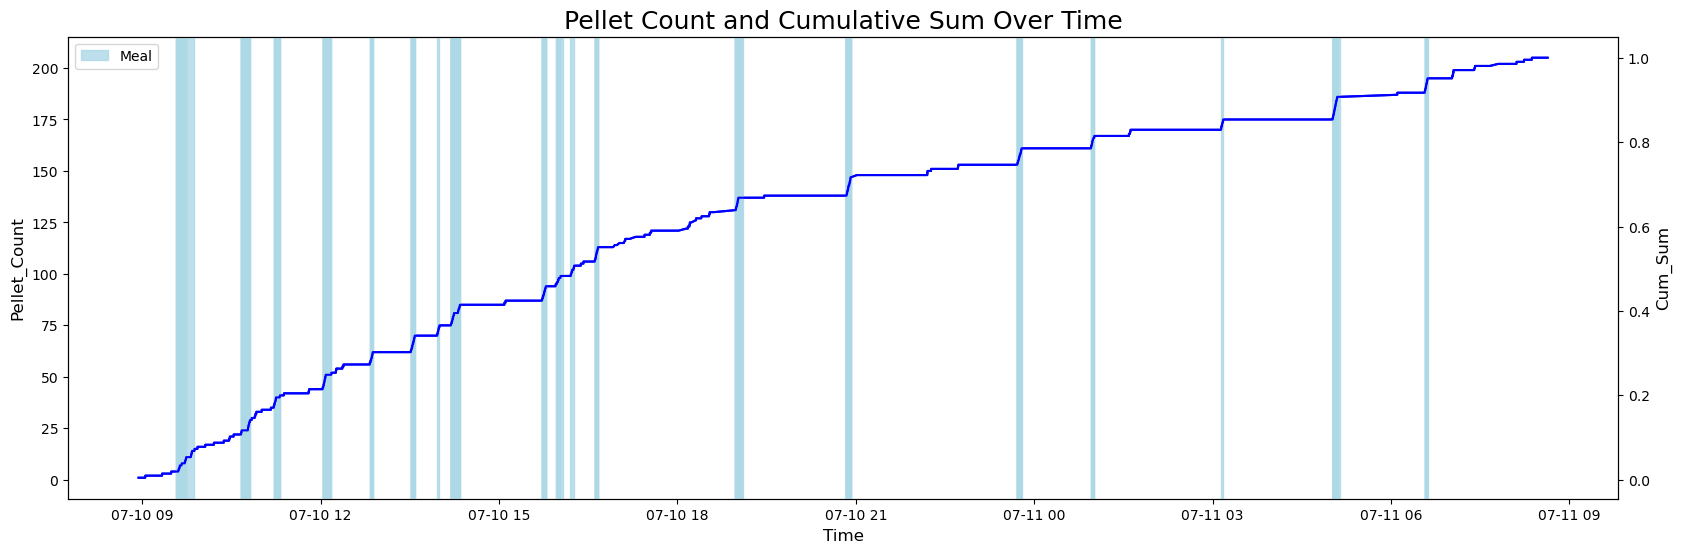

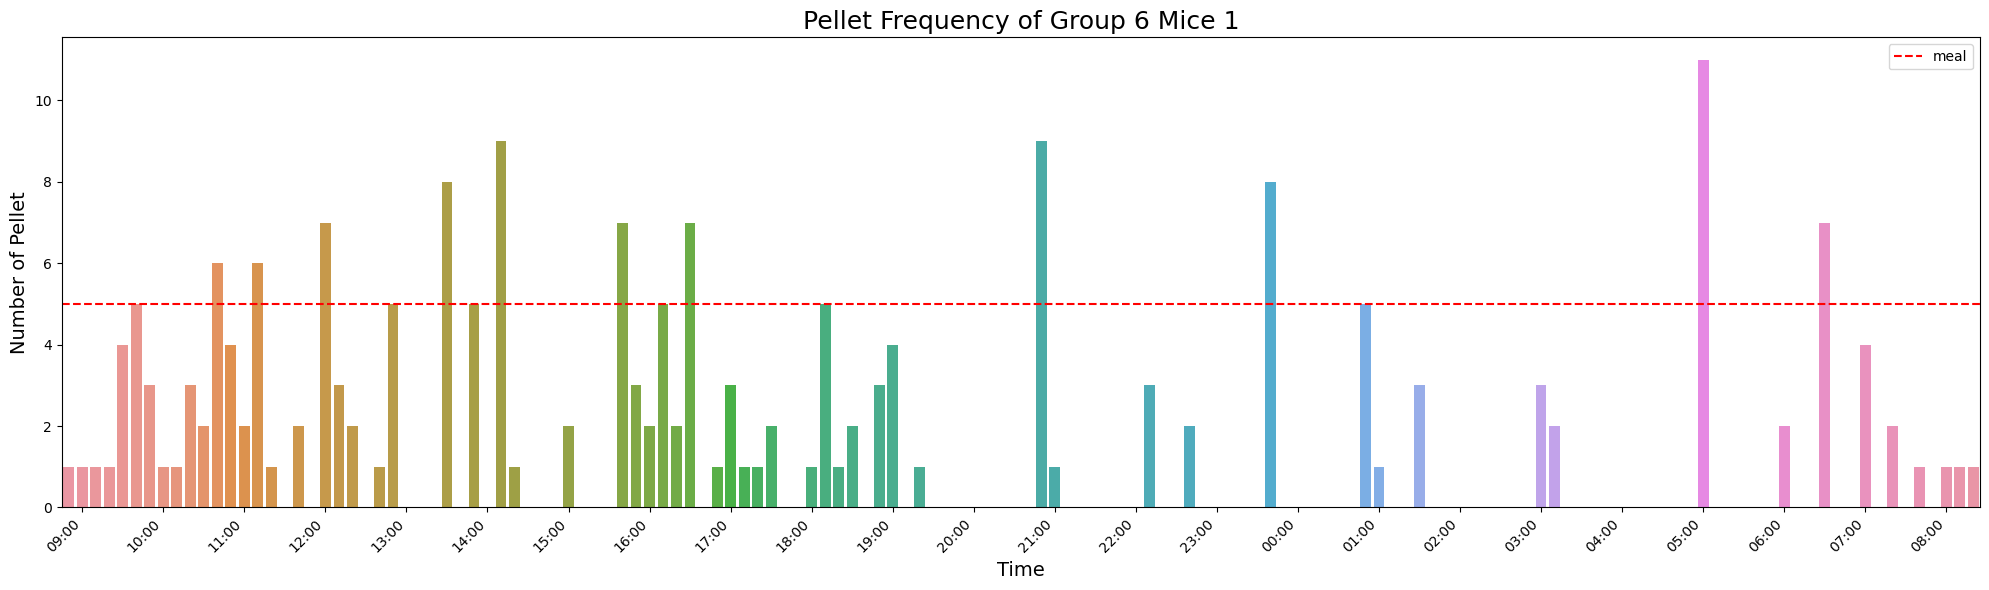

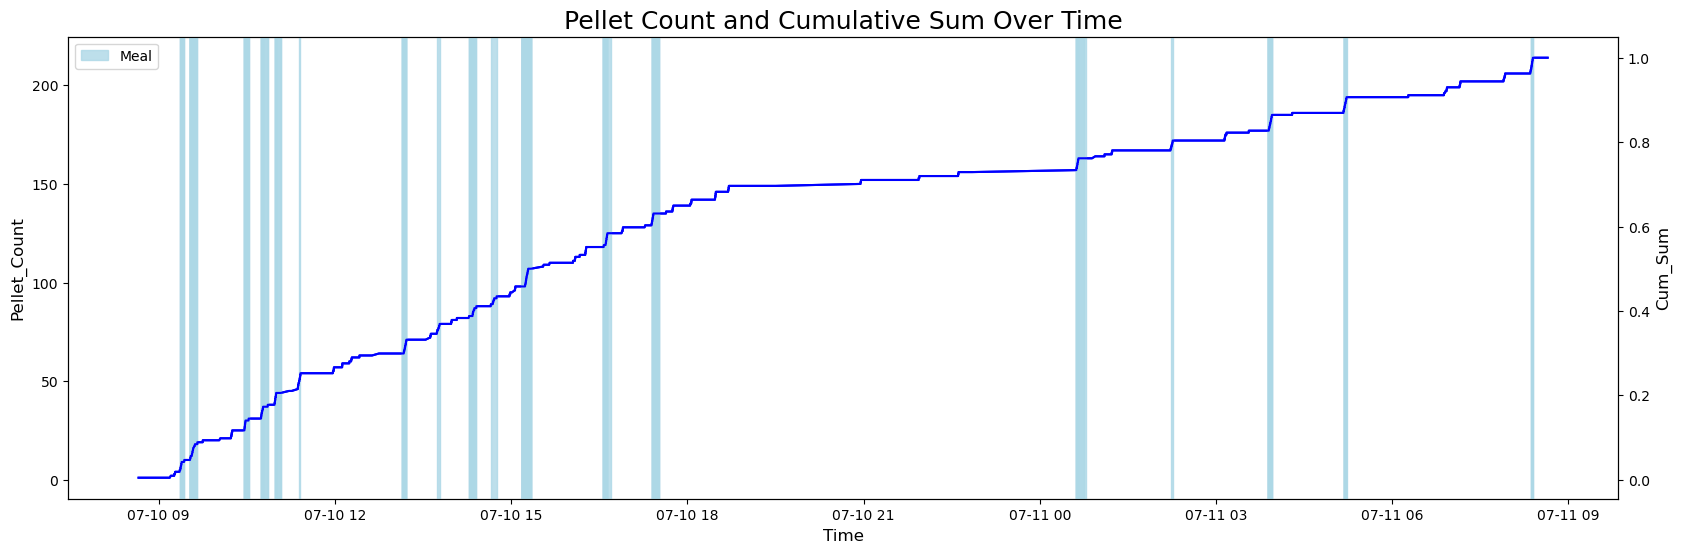

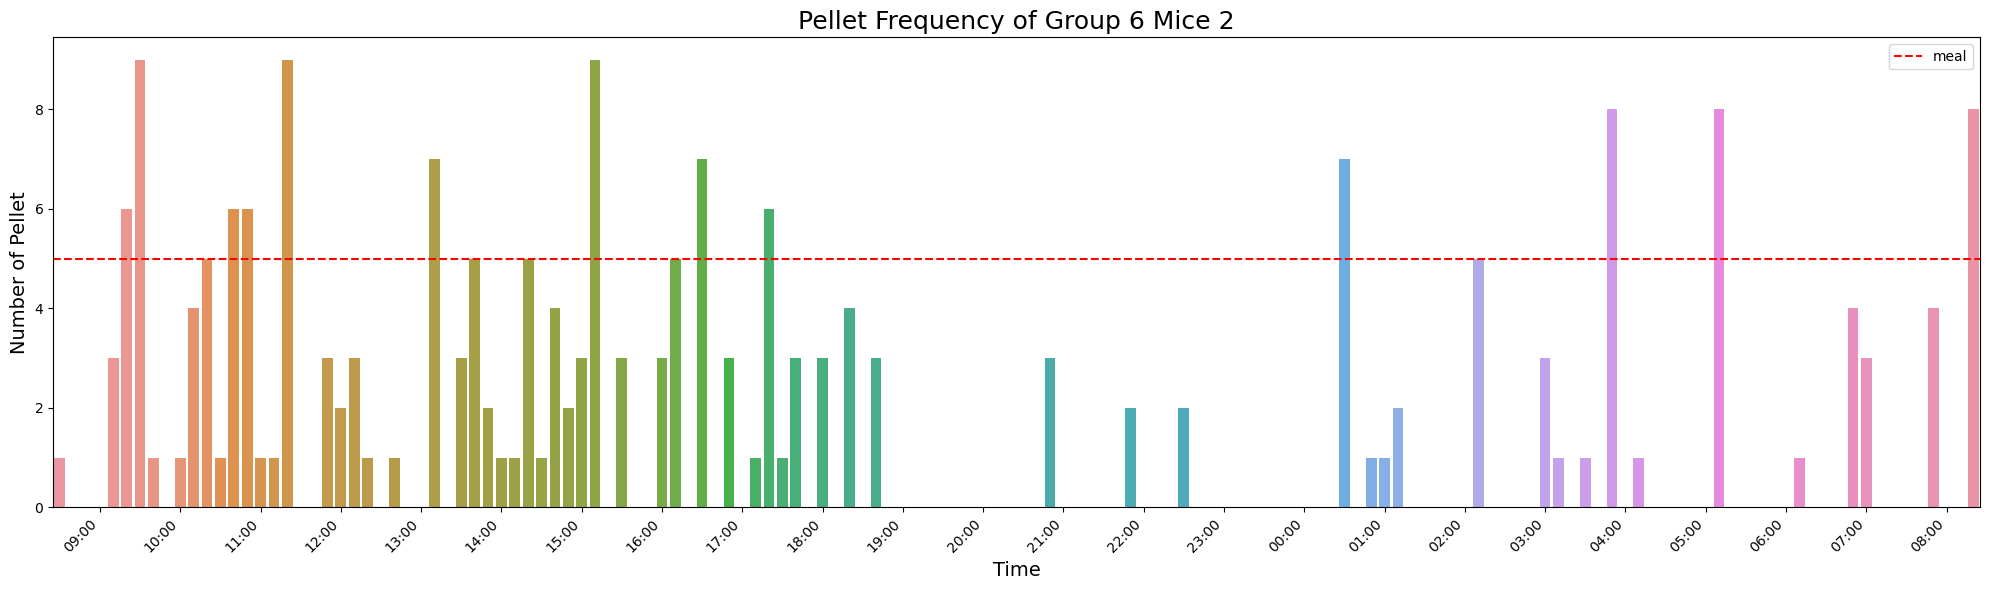

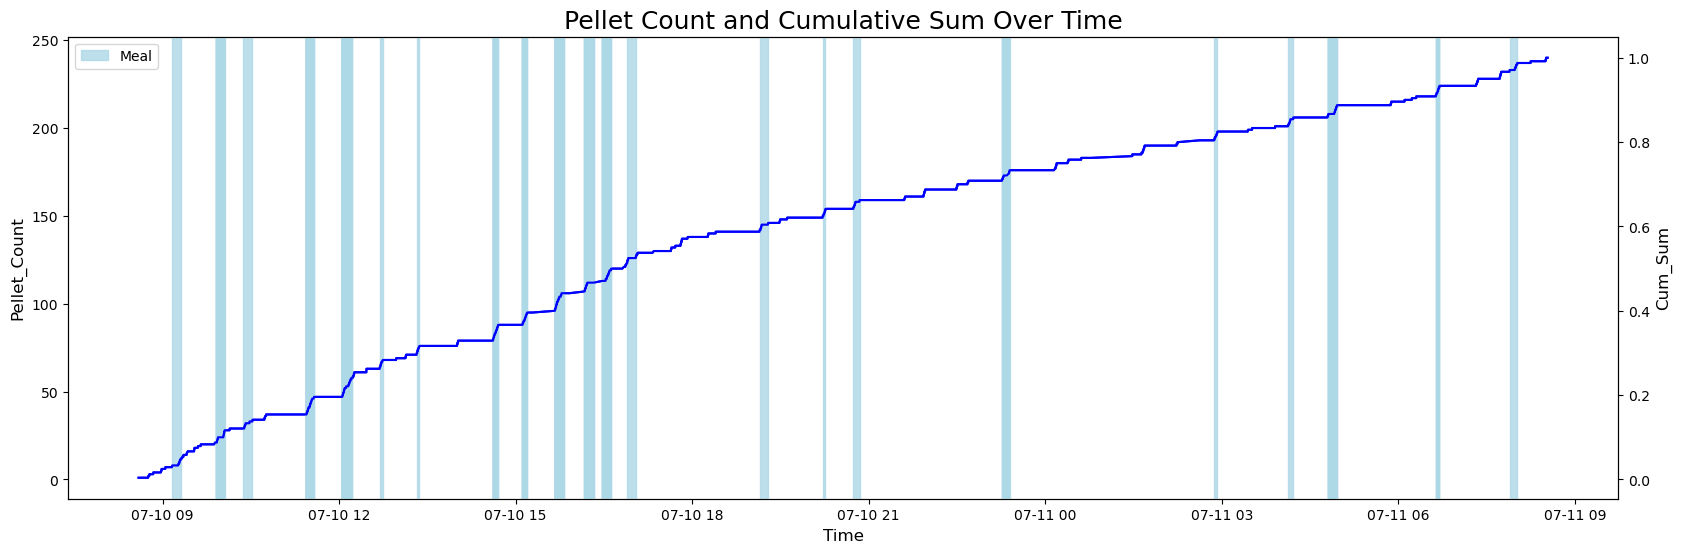

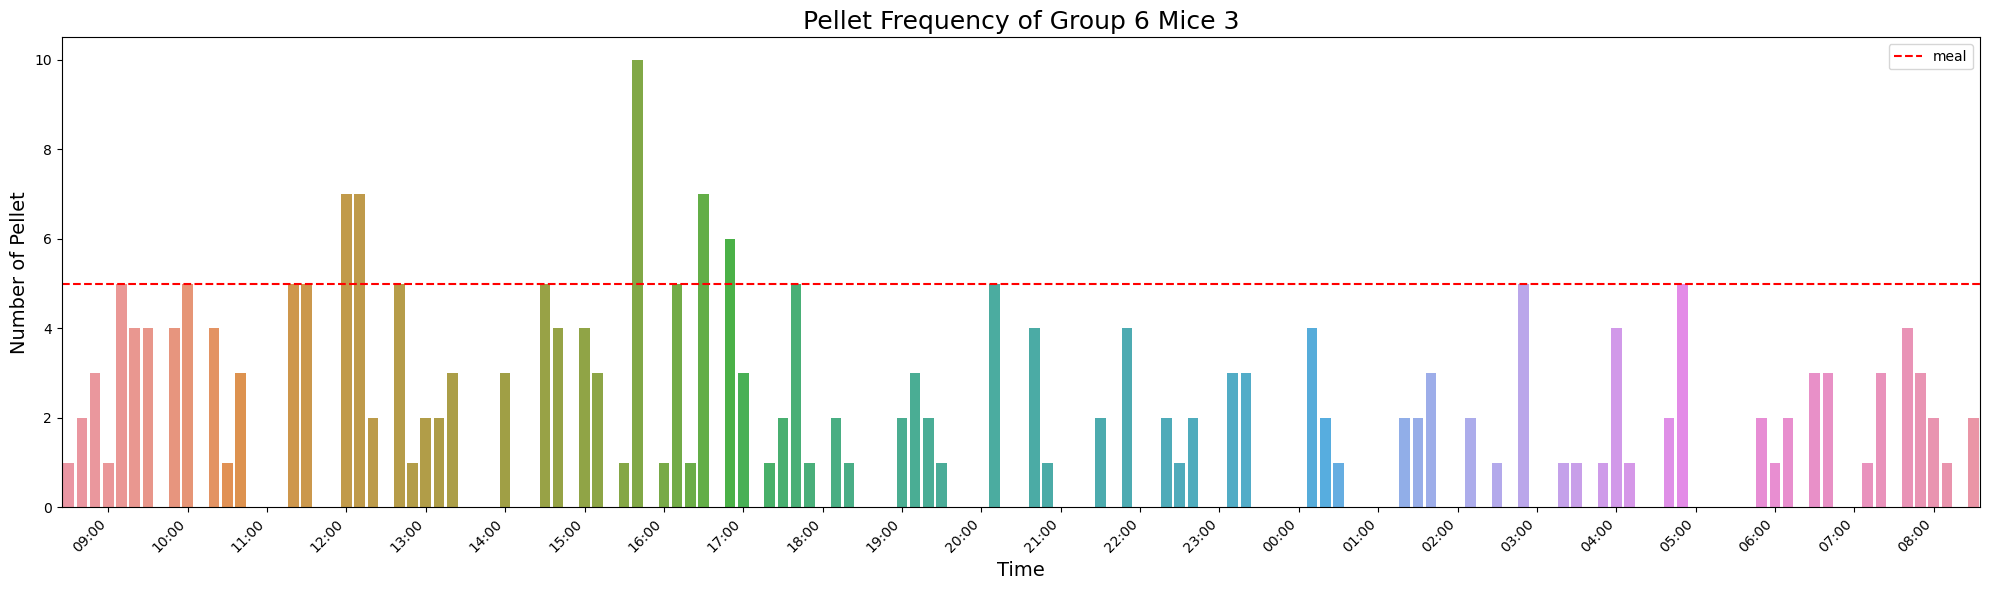

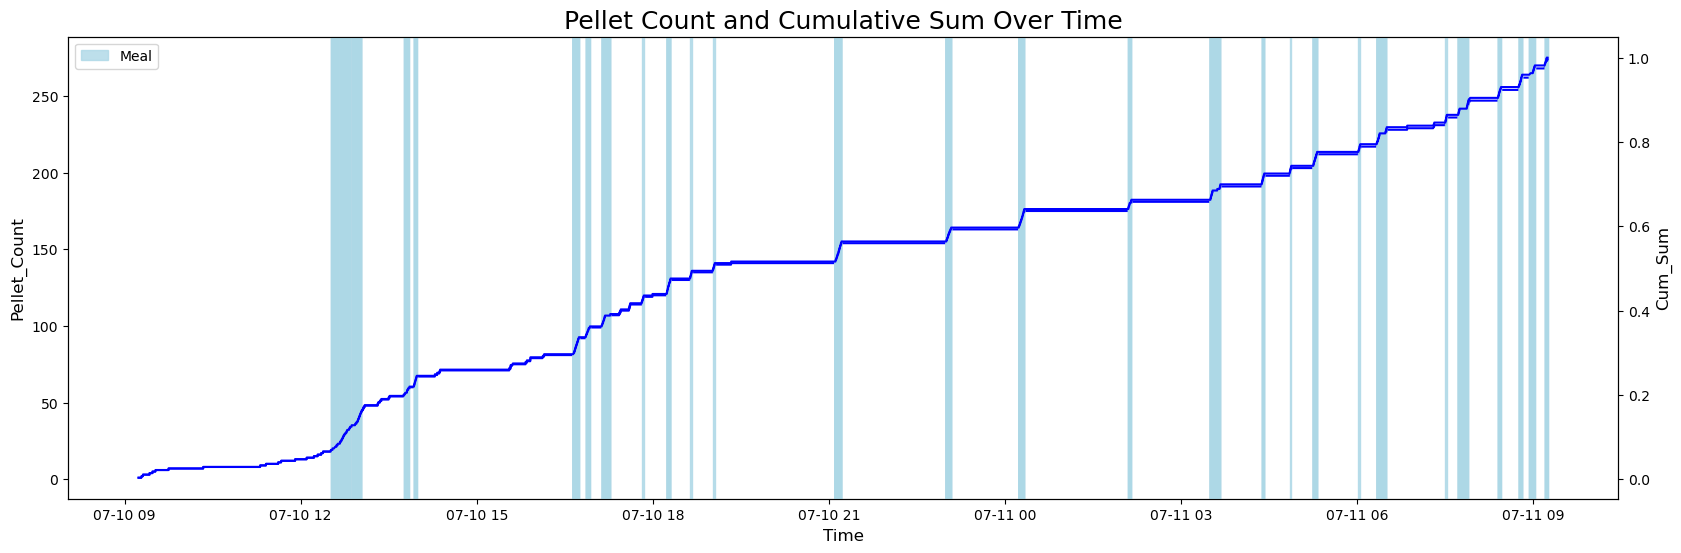

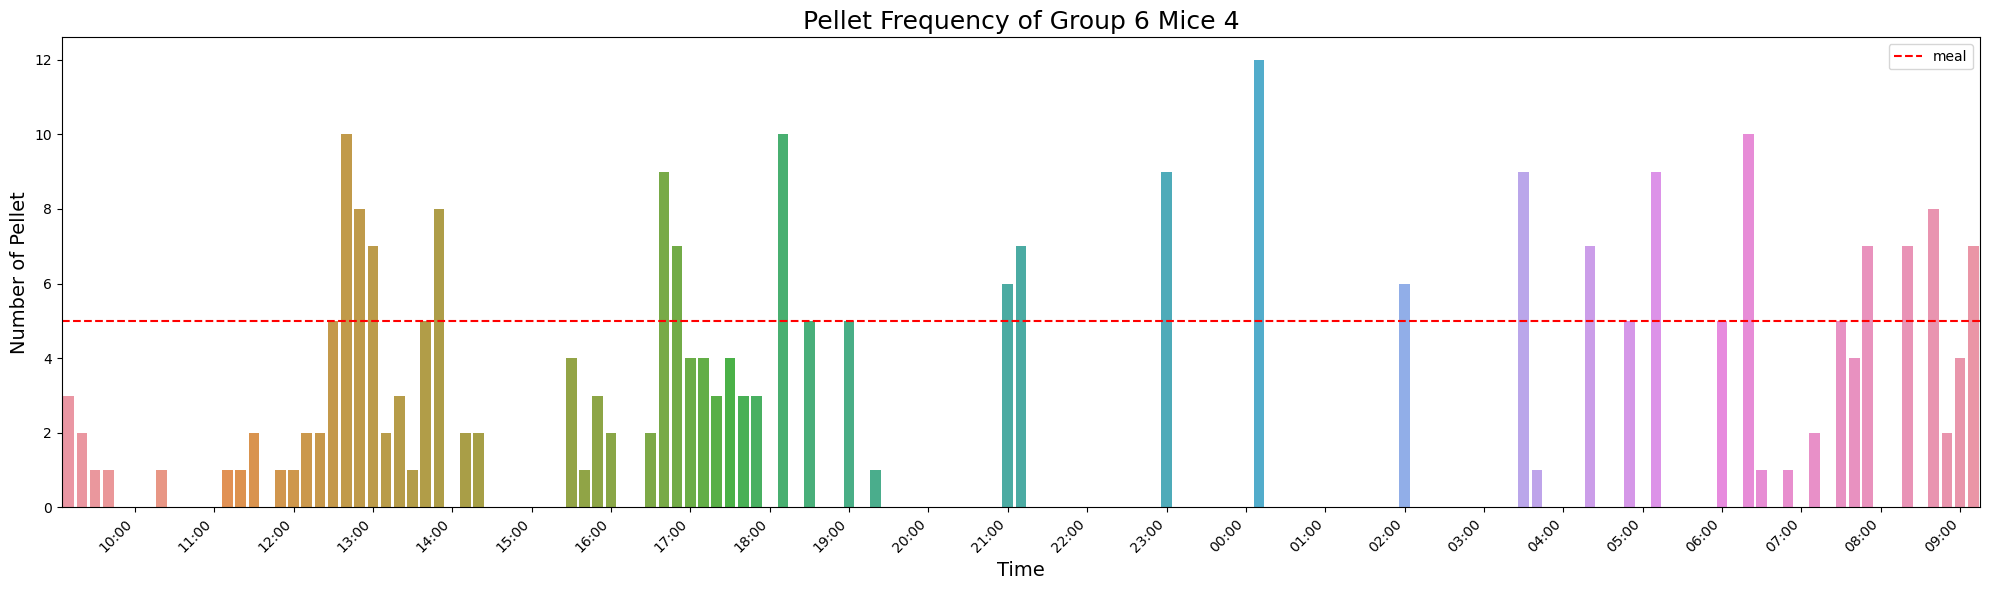

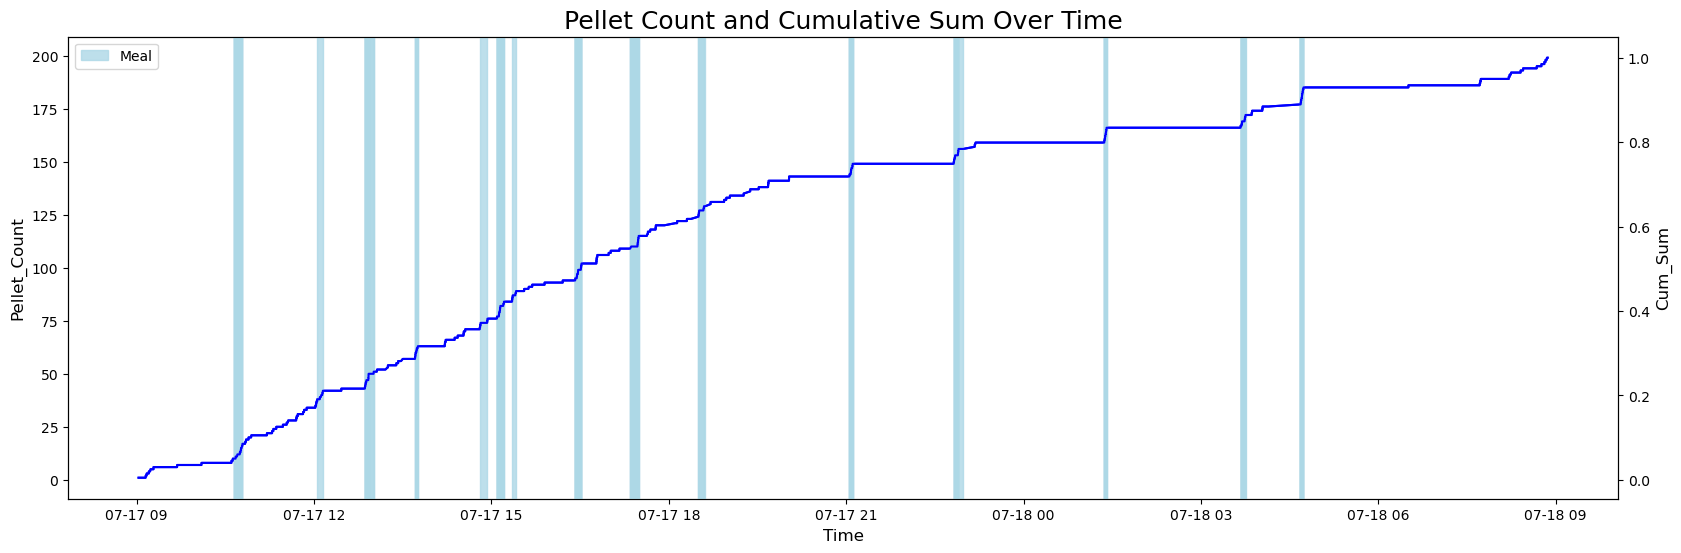

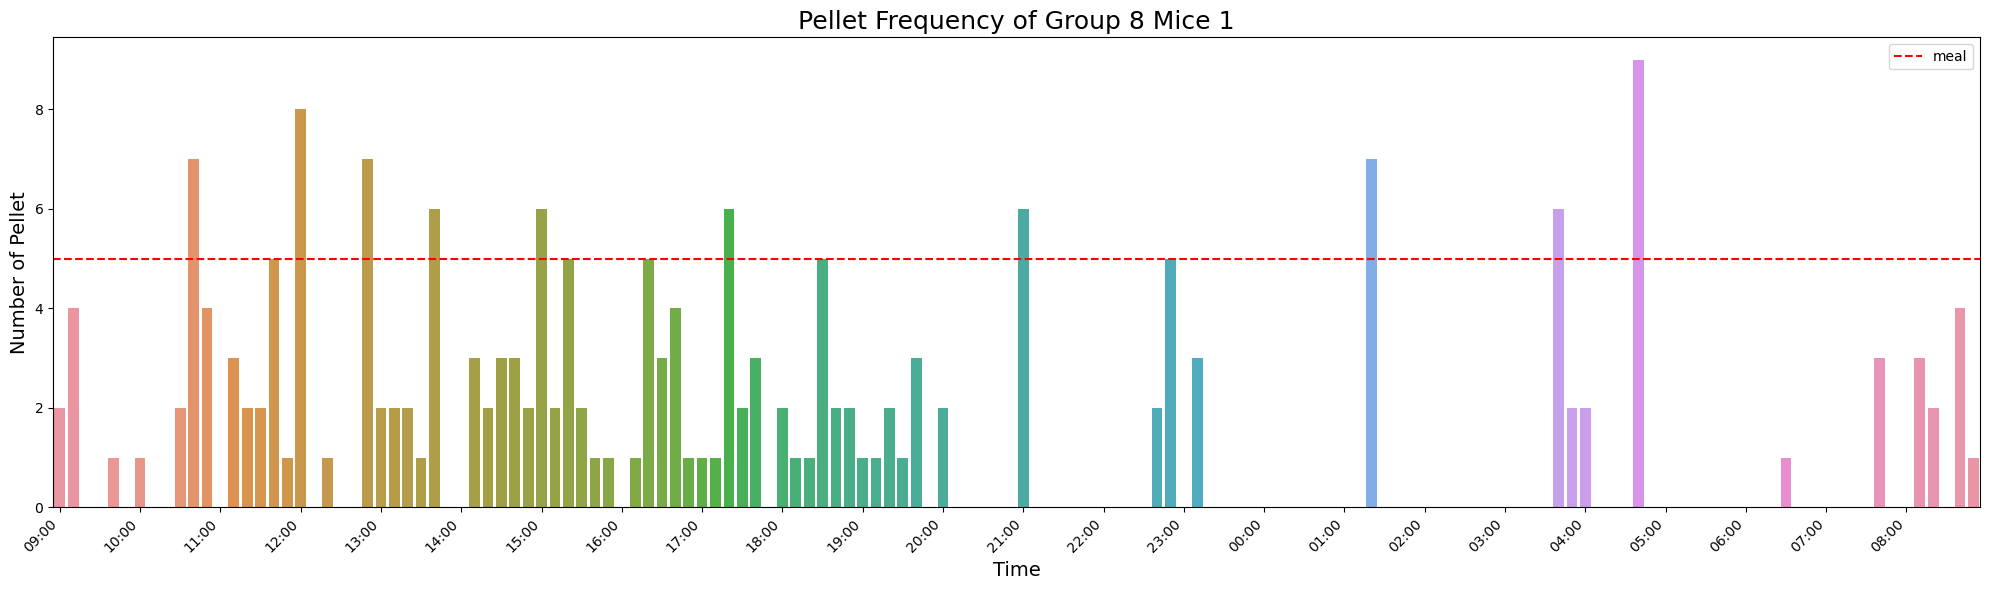

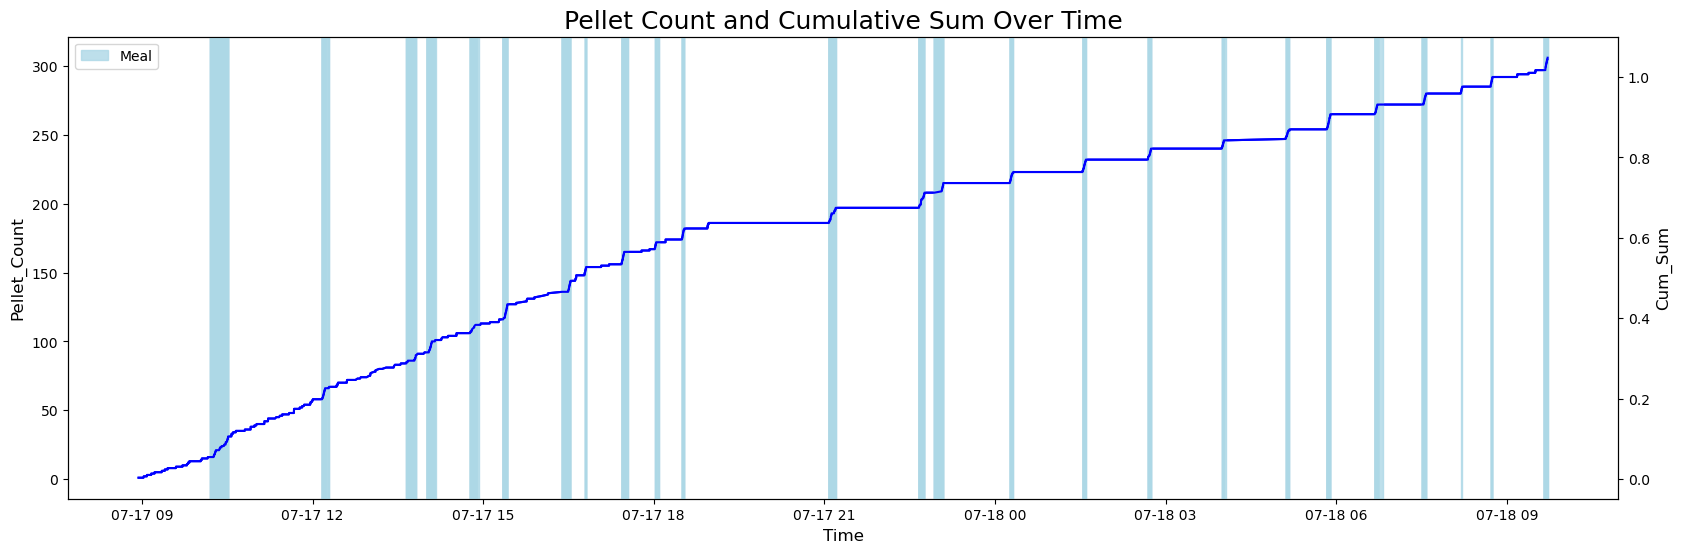

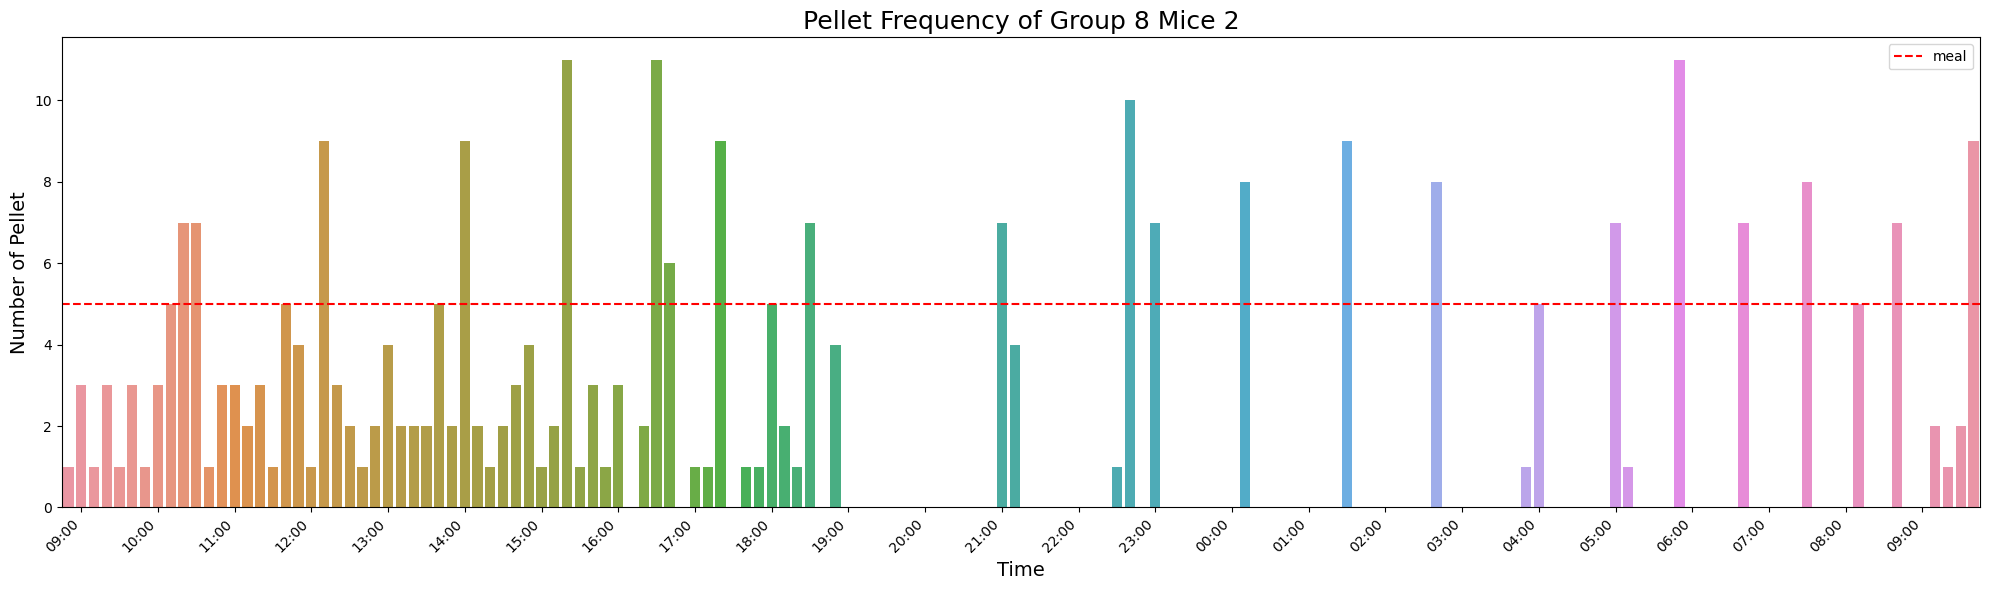

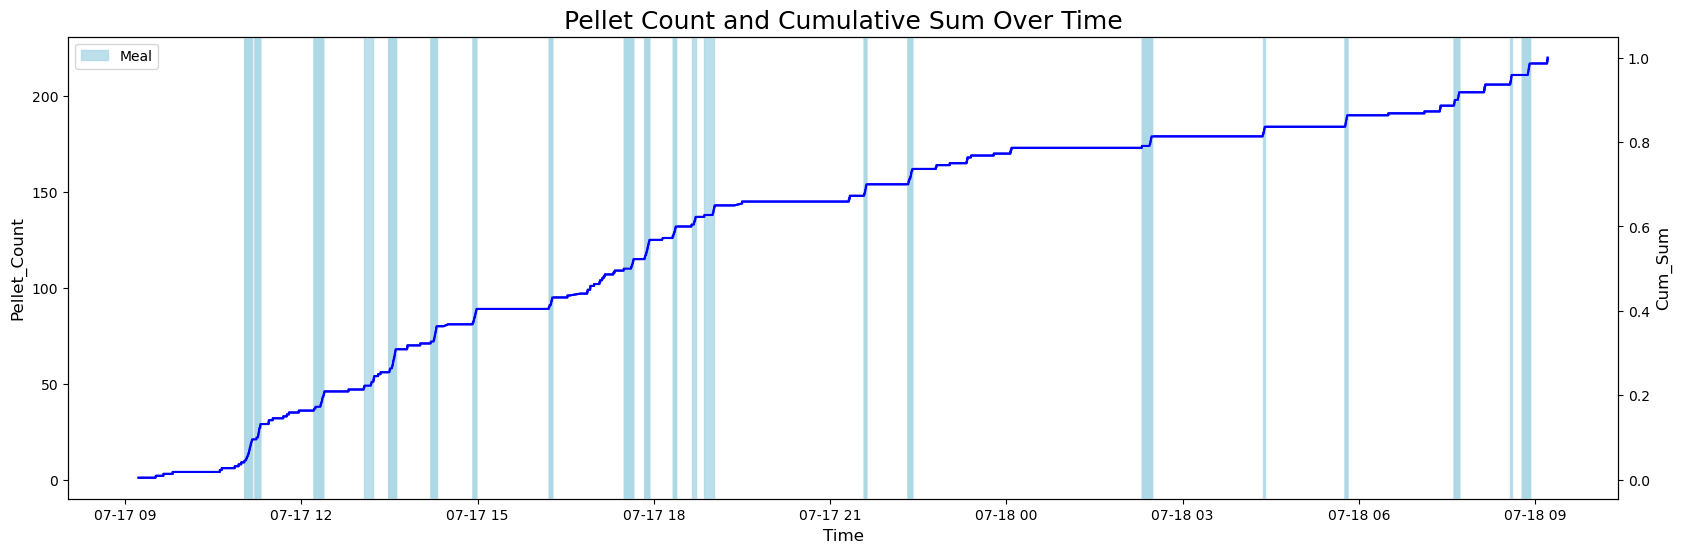

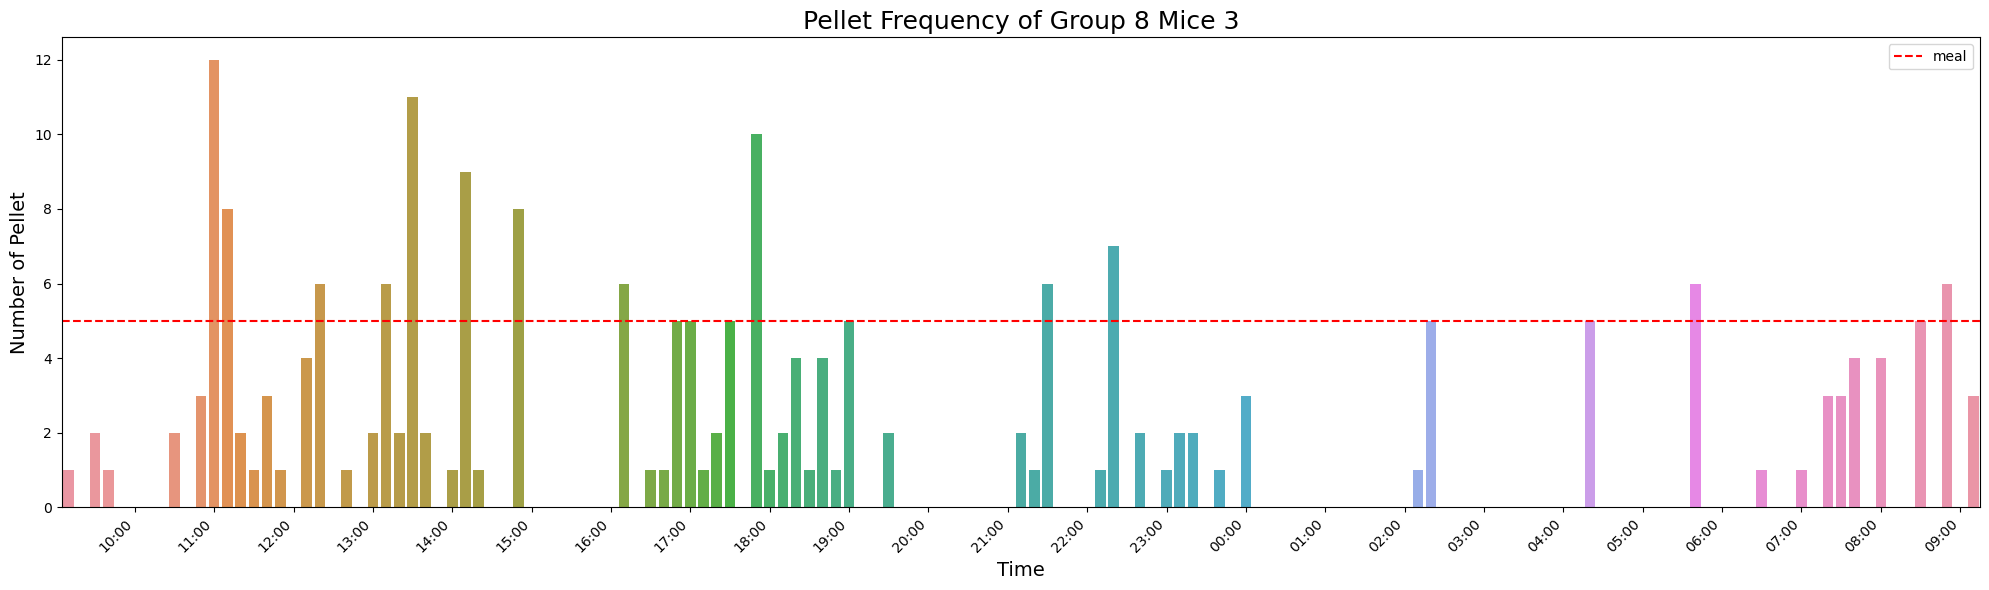

In [4]:
for sheet in paths.fr1_cask_sheet:
    data = ml.process_sheet(path, sheet)
    meal = ml.find_meals(data)
    ml.graphing_cum_count(data, meal)
    group = ml.find_pellet_frequency(data)
    bhv, num = tl.get_info_from_sheet(sheet)
    ml.graph_pellet_frequency(group, bhv, num)
    temp = ml.average_pellet(group)
    cask_pellet_avg.append(temp)

In [5]:
print('Control Average Pellet:', ctrl_pellet_avg)
print('Cask Average Pellet:', cask_pellet_avg)

Control Average Pellet: [9.842, 8.601, 8.844, 8.892, 10.196, 9.483, 9.483, 9.441, 9.357, 9.465, 9.959]
Cask Average Pellet: [8.471, 8.098, 7.552, 10.5, 8.723, 8.979, 10.0, 11.458, 8.35, 12.322, 9.167]


In [6]:
statistic, p_value = stats.mannwhitneyu(ctrl_pellet_avg, cask_pellet_avg, alternative='two-sided')

print(f"U Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

U Statistic: 71.0
P-value: 0.5112866462906049
There is no significant difference between the two groups.


### Graph Average Pellet

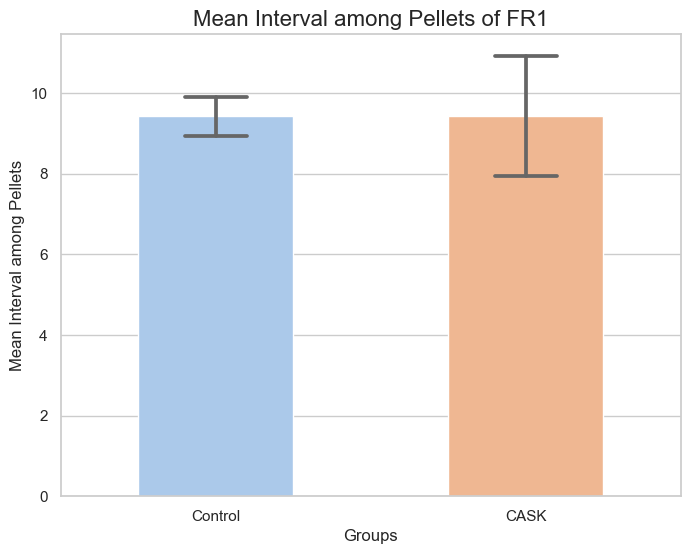

In [7]:
average = [
    np.mean(ctrl_pellet_avg),
    np.mean(cask_pellet_avg)
]

# Create DataFrames for each group
data_ctrl = pd.DataFrame({'Group': 'Control', 'Value': ctrl_pellet_avg})
data_cask = pd.DataFrame({'Group': 'CASK', 'Value': cask_pellet_avg})

# Concatenate the two DataFrames
data = pd.concat([data_ctrl, data_cask])

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the bar plot with error bars
ax = sns.barplot(x="Group", y="Value", data=data, palette="pastel",
                 errorbar="sd", capsize=0.2, width=0.5, errcolor='0.4')

plt.title('Mean Interval among Pellets of FR1', fontsize=16)
plt.xlabel('Groups')
plt.ylabel('Mean Interval among Pellets')
plt.show()


In [8]:
ctrl_flip = [8.743, 8.432, 7.142, 8.203, 7.115, 8.253]
cask_flip = [8.203, 8.256, 7.723, 10.776, 11.292, 4.818, 8.493, 7.52, 8.158]

ctrl_fr1 = ctrl_pellet_avg
cask_fr1 = cask_pellet_avg

In [9]:
statistic, p_value = stats.mannwhitneyu(ctrl_flip, ctrl_fr1, alternative='two-sided')

print(f"U Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

U Statistic: 1.0
P-value: 0.0015359145454155747
There is a significant difference between the two groups.


In [10]:
invs.perform_T_test(ctrl_flip, ctrl_fr1)

P Value is  0.00014907115742250434
There is a significant difference between the two groups.


In [11]:
statistic, p_value = stats.mannwhitneyu(cask_flip, cask_fr1, alternative='two-sided')

print(f"U Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

U Statistic: 29.0
P-value: 0.12864313895307422
There is no significant difference between the two groups.


In [12]:
invs.perform_T_test(cask_flip, cask_fr1)

P Value is  0.17527182217019896
There is no significant difference between the two groups.


* Pellet Intervals of cask group and control group has generally no significant difference
* Experimental groups has larger variance among their average pellet intervals